In [1]:
import pandas as pd
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import mplhep as hep
plt.style.use(hep.style.ROOT)
plt.style.use(hep.style.firamath)
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 2

In [3]:
def plot_data(X, features, y=None, path=None):
    # plt.rcParams["text.usetex"] = False
    # # plt.rcParams['figure.figsize'] = 6, 2
    # # plt.rcParams['lines.markersize'] = 2
    # plt.rcParams['lines.linewidth'] = 2

    size = int(len(features)*1.5)   # old *0.6)
    dims = len(features)
    if y is not None:
        dims += 1

    fig, axs = plt.subplots(dims, 1, figsize=(17, size), sharex=True)

    for dim, feat in enumerate(features):  # iterate through the features we're using
        # print(feat)
        x_t = X[:, dim]
        axs[dim].plot(x_t)
        # if y is not None:
        #     y_scaled = np.max(x_t)*y
        #     axs[dim].plot(y_scaled, '--', linewidth=1, color='tab:orange', label='anomalies')
        # turn ylabel by 90 degrees and shift it to the left
        axs[dim].set_ylabel(feat, rotation=0, ha='right', rotation_mode='default', labelpad=5)
        # Align all y-axis labels by setting the same label coordinates
        axs[dim].yaxis.set_label_coords(-0.1, 0.5)
        axs[dim].yaxis.set_label_coords(-0.1, 0.5)
        # axs[dim].legend(loc='upper right')
        # axs[dim].set_ylim(-1,1)
    if y is not None: # plot the target variable in last dimension if we have truth labels
        axs[-1].plot(y, '--', color='tab:red')
        # axs[-1].set_yticks([0, 1])
        axs[-1].set_ylabel('anomalies', rotation=0, ha='right', rotation_mode='default', labelpad=5)
        axs[-1].yaxis.set_label_coords(-0.1, 0.5)
        axs[-1].yaxis.set_label_coords(-0.1, 0.5)

    axs[-1].set_xlabel('Events')  # looks alignment-wise better than supxlabel
    # fig.supylabel('values')
    # fig.supxlabel('Time stamp [min]')
    plt.tight_layout()
    if path is not None:
        plt.savefig(f'{path}.png', dpi=100, facecolor='white')
    else:
        plt.show()
    plt.close()

## Eclipse data set

In [ ]:
f_train = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_train_data.hdf', 'r')
f_test = h5py.File('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_test_data.hdf', 'r')

In [ ]:
print(f_train.keys())
print(f_train.attrs.keys())

print(f_train['prod_train_data'].keys())
print(f_train['prod_train_data']['axis0'])

In [ ]:
with f_train as file:
    for key in file['prod_train_data'].keys():
        print('\n', key)
        # Access the dataset
        dataset = file['prod_train_data'][key]
        
        # Read the dataset into a numpy array
        data = dataset[:]
        print(data.shape)
        
        # # Since the dataset contains strings of fixed length, you can decode the bytes
        # # Convert bytes to strings
        # if key in ['axis0', 'block0_items', 'block1_items']:
        #     strings = [x.decode('utf-8').strip() for x in data]
        
        #     # Print the strings
        #     for s in strings:
        #         print(s)
        # else:
        #     print(data)

In [ ]:
with f_test as file:
    for key in file['prod_test_data'].keys():
        print('\n', key)
        # Access the dataset
        dataset = file['prod_test_data'][key]
        
        # Read the dataset into a numpy array
        data = dataset[:]
        print(data.shape)
        
        # # Since the dataset contains strings of fixed length, you can decode the bytes
        # # Convert bytes to strings
        # if key in ['axis0', 'block0_items', 'block1_items']:
        #     strings = [x.decode('utf-8').strip() for x in data]
        
        #     # Print the strings
        #     for s in strings:
        #         print(s)
        # else:
        #     print(data)

In [ ]:
label_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_train_label.csv')
label_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/eclipse_small_prod_dataset/prod_test_label.csv')

In [ ]:
print(label_test.shape, label_train.shape)
print(label_train)
y_train = label_train['binary_anom']
print(y_train[y_train==1])
y_test = label_test['binary_anom']
print(y_test[y_test==1], '\n', len(y_test[y_test==1]))

In [ ]:
label = label_test
label['job_id'] = label['job_id'].astype('str')
label['component_id'] = label['component_id'].astype('str') 
label.set_index(['job_id', 'component_id'], inplace=True)

print(label)

## IEEE-CIS fraud detection data set (from kaggle challenge 2019)

In [ ]:
x_train = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_transaction.csv')
x_train2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/train_identity.csv')

In [ ]:
print(x_train.shape, x_train2.shape)
print(x_train.columns) #, x_train2.columns)

for i, name in enumerate(x_train.columns):
    print(name)
    # print(x_train[name].dtypes)

# Filter columns that are of type 'float'
float_cols = x_train.select_dtypes(include='float').columns
# print("Columns with float values:", float_cols)
# for i, name in enumerate(float_cols.columns):
#     print(name)

# Filter columns that are NOT of type 'float'
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)

In [ ]:
x_train = x_train.sort_values(by='TransactionDT')
x_train = x_train.drop(columns=non_num_cols)
y_train = x_train['isFraud']
x_train = x_train.drop(columns='isFraud')
print(x_train.shape, y_train.shape)

In [ ]:
x_train = x_train.fillna(0)
has_nan = y_train.isnull().any()
print(has_nan)
print(x_train.isnull().any())

In [ ]:
X = np.array(x_train)
y = np.array(y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
from preprocess import normalize3
print(max(X_train[0]))
X_train, min_a, max_a = normalize3(X_train, min_a=None)
print(max(X_train[0]))
X_test, _, _ = normalize3(X_test, min_a, max_a)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for dim in range(5):
    x_t, l = X_train[:10000, dim], y_train[:10000]
    plt.figure(figsize=(10, 3))
    plt.plot(x_t, label='data')
    plt.plot(l, '--', linewidth=0.2)
    plt.fill_between(np.arange(l.shape[0]), l, color='tab:orange', alpha=0.3, label='Anomaly')
    plt.legend()
    plt.show()
    plt.close()



In [ ]:
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(y_train.shape, y_test.shape)

In [ ]:
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/train_1.npy', X_train)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/test_1.npy', X_test)
np.save('/Users/lauraboggia/VSCode_projects/TranAD/processed/IEEECIS/labels_1.npy', y_test)

In [ ]:
# x_train['day'] = x_train['TransactionDT'] / (24 * 60 * 60)  # to convert seconds to hours

In [ ]:
# x_train['uid1'] =  (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str)
# x_train['uid2'] =  (x_train.card1.astype(str) +'_' + \
#             x_train.addr1.astype(str) +'_' + \
#             (x_train.day - x_train.D1).astype(str) +'_' + \
#             x_train.P_emaildomain.astype(str))

In [ ]:
# print(x_train['uid1'])
# print(x_train['uid1'].unique)
# print(x_train['uid2'])
# print(x_train['uid2'].unique)

In [ ]:
x_test = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_transaction.csv')
x_test2 = pd.read_csv('/Users/lauraboggia/VSCode_projects/TranAD/data/ieee-fraud-detection/test_identity.csv')


In [ ]:
print(x_test.columns)
print(x_test.shape)

for i, name in enumerate(x_test.columns):
    print(name)

In [ ]:
x_train = pd.sort_values(by='')

## IEEEE-CIS challenge from kaggle loaded from fraud-dataset-benchmark (contains UID)

In [ ]:
x_train = pd.read_csv('data/ieeecis/train.csv')
x_test = pd.read_csv('data/ieeecis/test.csv')
labels = pd.read_csv('data/ieeecis/labels.csv')

In [ ]:
print(x_train.shape, x_test.shape)
# print(x_train.columns, x_test.columns)
print(labels.shape)

In [ ]:
print(x_train.shape)
print(x_train.dtypes)

# Filter columns that are NOT of type 'float' and for now pop them out
non_num_cols = x_train.select_dtypes(exclude=['float', 'int']).columns
print("Columns without numeric values:", non_num_cols, len(non_num_cols))
for i, name in enumerate(non_num_cols):
    print(name, x_train[name].dtypes)
    # if name not in ['ENTITY_ID', 'EVENT_TIMESTAMP']:
    #     x_train.pop(name)
    #     x_test.pop(name)

print(x_train.shape)
print(x_test.shape)

In [ ]:
x_train = x_train.sort_values(['EVENT_TIMESTAMP'])
x_test = x_test.sort_values(['EVENT_TIMESTAMP'])
date_train = x_train.pop('EVENT_TIMESTAMP')
print(date_train.shape, date_train)
date_test = x_test.pop('EVENT_TIMESTAMP')
print(date_test.shape, date_test)

In [ ]:
feature_names = list(x_train.columns)
feature_names.remove('ENTITY_ID') # because we don't want to use them as a feature
feature_names.remove('TransactionID') # because we don't want to use them as a feature
print(feature_names)

In [ ]:
# Group by ENTITY_ID for train data
grouped = x_train.groupby('ENTITY_ID')
print(grouped.size(), len(grouped))
# count how many entries in group are >= 50
train_uid = grouped.size()[grouped.size() >= 50].index
train_uid = list(train_uid)
print(len(train_uid), train_uid)
max_len = max(grouped.size())
print(max_len, max(grouped.size()[grouped.size() == max_len].index))


In [ ]:
# # Convert each group to a 2D numpy array and stack them into a list of 2D data frames, first approach
# x_train3 = [group.drop(columns=['ENTITY_ID', 'TransactionID']).values for name, group in grouped if len(group) >= 50]

# print(len(x_train3), len(train_uid))

In [ ]:
# Convert each group to a 2D numpy array and stack them into a list of 2D data frames, second approach, here first plotting
short_list = ['p_emaildomain', 'r_emaildomain', 'deviceinfo']

grouped = x_train.groupby('ENTITY_ID')
for i, feat in enumerate(feature_names):    # enumerate(short_list): 
    tmp = np.empty((0))  # reset this temporary array for each feature
    print(feat)

    for name, group in grouped:
        if len(group) >= 50:
            # print(name, group)
            df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
            if feat in non_num_cols:
                df[feat] = df[feat].fillna('missing')
                
            else:
                df[feat] = df[feat].fillna(0)
            tmp = np.concatenate((tmp, df[feat].values))
    
    print(f'{len(np.unique(tmp))} unique values out of {len(tmp)}')  # constructs set of df[feat] and counts the number of unique values

    if feat in non_num_cols:
        # for plotting
        unique_values, counts = np.unique(tmp, return_counts=True)
        if unique_values.shape[0] > 25:  # take 25 most frequent values for plots
            idx = np.argsort(counts)[::-1][:25]
            unique_values = unique_values[idx]
            counts = counts[idx]
            lab = f'showing 25 most frequent \nof {len(np.unique(tmp))} unique values'
        else:
            lab = f'{len(np.unique(tmp))} unique values'
        
        plt.bar(unique_values, counts, label=lab)
        if feat in ['p_emaildomain', 'r_emaildomain', 'deviceinfo']:
            plt.xticks(rotation=50, ha='right')
        plt.title(feat)
        plt.legend()
        plt.tight_layout()
        # plt.show()
        # plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/plots_data/IEEECIS_new/feature_distr_zoom/{feat}.png', dpi=300, facecolor='white')
        plt.close()

    else:
        print(np.max(tmp), np.min(tmp))

        plt.hist(tmp, bins=50, range=[np.quantile(tmp,0.03), np.quantile(tmp,0.97)], label=f'mean: {np.mean(tmp):.1f}, std: {np.std(tmp):.1f} \nmin: {np.min(tmp):.1f}, max: {np.max(tmp):.1f}')
        plt.title(feat)
        plt.legend()
        plt.tight_layout()
        # plt.show()
        # plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/plots_data/IEEECIS_new/feature_distr_zoom/{feat}.png', dpi=300, facecolor='white')
        plt.close()



In [ ]:
# Convert each group to a 2D numpy array and stack them into a list of 2D arrays, second approach
from sklearn.preprocessing import OneHotEncoder

short_list = ['p_emaildomain', 'r_emaildomain', 'deviceinfo']
other_values = {}
encoding = {}
# means = {}  # next step
# std = {}

grouped = x_train.groupby('ENTITY_ID')
for i, feat in enumerate(feature_names):  
    tmp = np.empty((0))  # reset this temporary array for each feature

    # for name, group in grouped:  # first get all transactions in train data regardless of uid
    #     if len(group) >= 50:
    #         # print(name, group)
    #         df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
    #         if feat in non_num_cols:
    #             df[feat] = df[feat].fillna('missing')
    #         else:
    #             df[feat] = df[feat].fillna(0)
    #         tmp = np.concatenate((tmp, df[feat].values))
    
    # print(f'{len(np.unique(tmp))} unique values out of {len(tmp)}')  # constructs set of df[feat] and counts the number of unique values

    if feat in non_num_cols:
        print(feat)
        for name, group in grouped:  # first get all transactions in train data regardless of uid
            if len(group) >= 50:
                # print(name, group)
                df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
                df[feat] = df[feat].fillna('missing')
                tmp = np.concatenate((tmp, df[feat].values))

        # for encoding 
        unique_values, counts = np.unique(tmp, return_counts=True)
        if len(unique_values) > 50:  # take 100 most frequent values for encoding
            idx = np.argsort(counts)
            unique_values = unique_values[idx]  # unique values sorted in frequency
            other_values[feat] = unique_values[49:]   # values to be encoded as 'other'
            print(other_values)
            # replace all elements of tmp that are in other_values with 'other'
            idx = np.where(np.isin(tmp, other_values[feat]))
            tmp[idx] = 'other'
            # print(len(np.unique(tmp)))

        enc = OneHotEncoder(handle_unknown='ignore').fit(tmp.reshape(-1, 1))
        print(enc.categories_, len(enc.categories_[0]))
        encoding[feat] = enc

print(encoding)


In [ ]:
print(encoding.keys())

In [ ]:
# Convert each group to a 2D numpy array and stack them into a list of 2D data frames, second approach
x_train3 = []

grouped = x_train.groupby('ENTITY_ID')
train_uid = grouped.size()[grouped.size() >= 50].index
train_uid = list(train_uid)
for name, group in grouped:  # second get all transactions in train data keeping structure of uid
    if len(group) >= 50:
        # print(name, group)
        df = group.drop(columns=['ENTITY_ID', 'TransactionID'])
        print(df.columns, df.shape)
        for i, feat in enumerate(feature_names):
            print(feat)
            if feat in non_num_cols:
                df[feat] = df[feat].fillna('missing')
            else:
                df[feat] = df[feat].fillna(0)
            
            arr = df[feat].values
            print(arr.shape, len(np.unique(arr)))

            if feat in non_num_cols:
                if feat in other_values.keys():
                    idx = np.where(np.isin(arr, other_values[feat]))
                    arr[idx] = 'other'

                enc = encoding[feat]
                new_feat = enc.get_feature_names_out(input_features=[feat])
                print(new_feat)
                arr = enc.transform(arr.reshape(-1, 1)).toarray()                

                new_df = pd.DataFrame(arr, columns=new_feat)    # will start indexing from 0, creates pbm with concatenation
                print(new_df.shape)
                print(df.shape)
                df = df.reset_index(drop=True)          # Reset index to ensure proper concatenation
                new_df = new_df.reset_index(drop=True)  # Reset index to ensure proper concatenation
                df = pd.concat([df, new_df], axis=1)
                df.drop(columns=[feat], inplace=True)
                print(df.shape)

        # check if still any nan in df
        print(df.isnull().any().any())
        x_train3.append(df.values)

print(len(x_train3), len(train_uid))
updated_feature_names = df.columns


In [ ]:
print(len(x_train3), x_train3[0].shape, x_train3[0])
print(len(train_uid))
print(len(updated_feature_names), updated_feature_names)

In [ ]:
# Convert each group to a 2D numpy array and stack them into a list of 2D data frames, second approach: for test data now
x_test3 = []

grouped_test = x_test.groupby('ENTITY_ID')
test_uid = grouped_test.size()[grouped_test.size() >= 20].index  # allow shorter time series for testing!
test_uid = list(test_uid)
for name, group in grouped_test:  # second get all transactions in test data keeping structure of uid
    if len(group) >= 20:
        df = group.drop(columns=['ENTITY_ID'])
        print(df.columns, df.shape)
        for i, feat in enumerate(feature_names):
            print(feat)
            if feat in non_num_cols:
                df[feat] = df[feat].fillna('missing')
            else:
                df[feat] = df[feat].fillna(0)
            
            arr = df[feat].values
            print(arr.shape, len(np.unique(arr)))

            if feat in non_num_cols:
                if feat in other_values.keys():
                    idx = np.where(np.isin(arr, other_values[feat]))
                    arr[idx] = 'other'

                enc = encoding[feat]
                new_feat = enc.get_feature_names_out(input_features=[feat])
                print(new_feat)
                arr = enc.transform(arr.reshape(-1, 1)).toarray()                

                new_df = pd.DataFrame(arr, columns=new_feat)    # will start indexing from 0, creates pbm with concatenation
                print(new_df.shape)
                print(df.shape)
                df = df.reset_index(drop=True)          # Reset index to ensure proper concatenation
                new_df = new_df.reset_index(drop=True)  # Reset index to ensure proper concatenation
                df = pd.concat([df, new_df], axis=1)
                df.drop(columns=[feat], inplace=True)
                print(df.shape)

        # check if still any nan in df
        print(df.isnull().any().any())
        x_test3.append(df.values)

print(len(x_test3))
# updated_feature_names = df.columns


In [ ]:
print(len(x_test3), x_test3[0].shape, x_test3[0])

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
for i, arr in enumerate(x_train3):
    print(f'time series for user: {train_uid[i]} has shape:\n {arr.shape}')

    # for j in range(0, len(updated_feature_names), 20):
    #     plot_data(arr[:,j:j+20], updated_feature_names[j:j+20], path=f'plots_data/IEEECIS_new/train_{train_uid[i]}_{j}')
    
    # scaler = StandardScaler()
    # arr_scaled = scaler.fit_transform(arr)
    # plot_data(arr_scaled, feature_names, path=f'plots_data/IEEECIS_new/train_scaled_{train_uid[i]}')

    np.save(f'processed/IEEECIS_new2/train_{train_uid[i]}.npy', arr)

In [ ]:
print(test_uid)

In [ ]:
for i, arr in enumerate(x_test3):
    print(f'time series for user: {test_uid[i]} has shape:\n {arr.shape}')

    # for j in range(0, len(updated_feature_names), 20):
    #     plot_data(arr[:,j:j+20], updated_feature_names[j:j+20], path=f'plots_data/IEEECIS_new/test_{test_uid[i]}_{j}')
    
    test_transaction_id = arr[:, 0]     # transaction IDs of the test data (needed to identify corresponding labels)
    arr = arr[:, 1:]                    # remove the transaction IDs from test data
    print(arr.shape)
    
    # pick the corresponding labels of the used test transactions
    indices = np.where(np.isin(labels['TransactionID'], test_transaction_id))
    y_test = np.array(labels.iloc[indices]['EVENT_LABEL'])
    y_test = y_test[:, np.newaxis]
    print('labels shape: ', y_test.shape, 'nb of anomalous transactions: ', len(y_test[y_test==1]))

    # if test_uid[i] == '13623.0_498.0_117.0':
    #     for j in range(0, len(updated_feature_names), 20):
    #         plot_data(arr[:,j:j+20], updated_feature_names[j:j+20], y=y_test, path=f'plots_data/IEEECIS_new2/test_{test_uid[i]}_{j}')
    # else:
    #     plot_data(arr[:,:20], updated_feature_names[:20], y=y_test, path=f'plots_data/IEEECIS_new2/test_{test_uid[i]}_0')
    plot_data(arr[:,:20], updated_feature_names[:20], y=y_test, path=f'plots_data/IEEECIS_new2/test_{test_uid[i]}')

    np.save(f'processed/IEEECIS_new2/test_{test_uid[i]}.npy', arr)
    np.save(f'processed/IEEECIS_new2/labels_{test_uid[i]}.npy', y_test)
    # np.save(f'processed/IEEECIS_new2/ids_{test_uid[i]}.npy', test_transaction_id)

In [ ]:
# Group by ENTITY_ID for test data
grouped = x_test.groupby('ENTITY_ID')
print(grouped.size(), len(grouped))
# count how many entries in group are >= 20
test_uid = grouped.size()[grouped.size() >= 20].index
test_uid = list(test_uid)
print(test_uid)
max_len = max(grouped.size())
print(max_len, max(grouped.size()[grouped.size() == max_len].index))

# Convert each group to a 2D numpy array and stack them into a list of 2D data frames
x_test3 = [group.drop(columns='ENTITY_ID').values for name, group in grouped if len(group) >= 20]

print(len(x_test3), len(test_uid))

In [ ]:
print(len(x_test3), x_test3[0].shape, x_test3[0])

In [ ]:
# need to get the truth labels of the test data
for i, arr in enumerate(x_test3):
    print(f'time series for user: {test_uid[i]} has shape:\n {arr.shape}')

    test_transaction_id = arr[:, 0]     # transaction IDs of the test data (needed to identify corresponding labels)
    arr = np.nan_to_num(arr)            # test data
    
    # pick the corresponding labels of the used test transactions
    indices = np.where(np.isin(labels['TransactionID'], test_transaction_id))
    y_test = np.array(labels.iloc[indices]['EVENT_LABEL'])
    y_test = y_test[:, np.newaxis]
    print('labels shape: ', y_test.shape, 'nb of anomalous transactions: ', len(y_test[y_test==1]))

    # scaler already defined for train data? or better to redefine?
    arr_scaled = scaler.fit_transform(arr)

    print(arr_scaled.shape, y_test.shape)

    if len(y_test[y_test==1]) > 0:
        print(test_uid[i])
        plot_data(arr, feature_names, y=y_test, path=f'plots_data/IEEECIS_new/test_{test_uid[i]}')
        plot_data(arr_scaled, feature_names, y=y_test, path=f'plots_data/IEEECIS_new/test_scaled{test_uid[i]}')
    
        np.save(f'processed/IEEECIS_new/test_scaled_{test_uid[i]}.npy', arr_scaled)
        np.save(f'processed/IEEECIS_new/labels_{test_uid[i]}.npy', y_test)
        np.save(f'processed/IEEECIS_new/ids_{test_uid[i]}.npy', test_transaction_id)
    

## ATLAS time series data for AD in LAr data (from Vilius)

In [ ]:
# f = h5py.File('data/ATLAS_TS/user.vcepaiti.38697672.EXT0._000002.AnnotatorNtuple.h5', 'r')
f = h5py.File('data/ATLAS_DQM_TS/user.vcepaiti.Annotator.Good.04May2024.00361862.physics_Main_EXT0.h5', 'r')
# f = h5py.File('data/ATLAS_DQM_TS/user.vcepaiti.Annotator.SevNois.14May2024.00462542.physics_UPC.r15414_p6133_EXT0_EXT0.h5', 'r')
# f = h5py.File('data/ATLAS_DQM_TS/user.vcepaiti.Annotator.Good.16May2024.00361862.physics_CosmicCalo.r14138_p5427_EXT0.h5', 'r')
# f = h5py.File('data/ATLAS_DQM_TS/user.vcepaiti.Annotator.HVNONNOMINAL.03Jun2024.00430897.physics_Main.r15052_p5604_EXT0.h5', 'r')
# f = h5py.File('data/ATLAS_DQM_TS/user.vcepaiti.Annotator.PumpNoise.04Jun2024.00451140.physics_Main.r14858_p5785_EXT0.h5', 'r')
# f = h5py.File('data/ATLAS_DQM_TS/user.vcepaiti.Annotator.SevNois.14May2024.00462542.physics_HardProbes.f1399_m2209_EXT0.h5', 'r')
print(f.keys(), f.attrs.keys())
data = np.array(f['data'])
lumiblock = np.array(f['lb'])

In [ ]:
print(data.shape, data[0].shape, data[0,0].shape)

In [ ]:
print(f['event_labels'], f['event_numbers'], f['features'], f['run'])
evt_lb = np.array(f['event_labels'])
print(evt_lb.shape, evt_lb[0].shape)
print(np.min(evt_lb[2]), np.max(evt_lb[2]))
print(np.unique(evt_lb[2]))
print(np.any(np.logical_and(evt_lb != 0, evt_lb !=2)))
evt_nb = np.array(f['event_numbers'])
print(evt_nb.shape, evt_nb[0].shape)
features = np.array(f['features'])
print(features)
run = np.array(f['run'])
print(run.shape)
lb = np.array(f['lb'])
print(lb.shape)
print(lb)

In [7]:
# # 802 for CosmicCalo, 504 for HVNONNOMINAL, 787 for PumpNoise, 312 for HardProbes
# lb_idx = np.where(lb == 787)[0][0]  
# print(lb_idx)

In [ ]:
# check if run number the same over all runs
print(np.unique(run))
# check if all runs are actually the same
events = 0
for i in range(data.shape[0]):
    # print(data[i,0].shape)
    # print(np.all(data[0,0] ==data[i,0]))
    events += data[i,0].shape[0]
    if data[i,0].shape[0] > 1800 and data[i,0].shape[0] < 2000:
        print(i)
print(events)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for lb in range(data.shape[0]):  # iterate through lumiblocks
    fig, axs = plt.subplots(16, 1, figsize=(10, 25), sharex=True)

    for dim in range(16):  # iterate through 16 features we're using
        x_t = data[lb, dim]
        l = evt_lb[lb]
        l1 = (l==1) + 0
        l2 = (l==2) + 0
        l3 = (l==3) + 0
        # print(x_t.shape, x_t[0].shape)
        axs[dim].plot(x_t, label='data')
        axs[dim].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
        axs[dim].plot(l2, '--', linewidth=1, color='tab:red', label='noise burst')
        axs[dim].plot(l3, '--', linewidth=1, color='tab:purple', label='data corruption')
        axs[dim].set_ylabel(str(features[dim])[2:-1])
    axs[0].legend()
    fig.supylabel('label')
    fig.supxlabel('events')
    plt.tight_layout()
    plt.show()
    plt.close()
    break



In [ ]:
plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

for lb in range(data.shape[0]):  # iterate through lumiblocks
    fig, axs = plt.subplots(17, 1, figsize=(10, 28), sharex=True)

    for dim in range(16):  # iterate through 16 features we're using
        x_t = data[lb, dim]
        axs[dim].plot(x_t, label=f'{str(features[dim])[2:-1]}')
        axs[dim].legend(loc='upper right')
        # axs[dim].set_title(features[dim][2:])
    
    l = evt_lb[lb]      # same label for all dimensions/features
    l1 = (l==1) + 0
    l2 = (l==2) + 0
    l3 = (l==3) + 0
    axs[-1].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
    axs[-1].plot(l2, ':', linewidth=1, color='tab:green', label='noise burst')
    axs[-1].plot(l3, '-.', linewidth=1, color='tab:red', label='data corruption')
    axs[-1].legend(loc='upper right')
    # fig.supylabel('label')
    fig.supxlabel('events')
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/plots/data_lb{lb}.png', dpi=300, facecolor='white')
    plt.close()
    break



In [ ]:
for f in range(len(features)):
    features[f] = str(features[f])[2:-1]
print(features)

In [ ]:
# for lb in range(data.shape[0]):  # iterate through lumiblocks
x_t = np.stack(data[lb_idx])
x_t = x_t.T
y_t = evt_lb[lb_idx]
print(np.max(y_t), np.min(y_t))
print(x_t.shape, y_t.shape)
plot_data(x_t, features, y_t)


In [9]:
for l in range(data.shape[0]):
    x_t = np.stack(data[l])
    x_t = x_t.T
    y_t = evt_lb[l]
    lb_idx = lb[l]
    # print(lb_idx, x_t.shape, y_t.shape)
    np.save(f'processed/ATLAS_DQM_TS/train_Main_{lb_idx}.npy', x_t)

In [ ]:
# directly save as train data
# np.save('processed/ATLAS_DQM_TS/test_cosmicCalo.npy', x_t)
# np.save('processed/ATLAS_DQM_TS/labels_cosmicCalo.npy', y_t)
# np.save('processed/ATLAS_DQM_TS/test_hvononNominal.npy', x_t)
# np.save('processed/ATLAS_DQM_TS/labels_hvononNominal.npy', y_t)
# np.save('processed/ATLAS_DQM_TS/test_pumpNoise.npy', x_t)
# np.save('processed/ATLAS_DQM_TS/labels_pumpNoise.npy', y_t)
# np.save('processed/ATLAS_DQM_TS/test_hardProbesnpy', x_t)
# np.save('processed/ATLAS_DQM_TS/labels_hardProbes.npy', y_t)

In [ ]:
labels = {}
for i in range(5):
    labels[f'lumiblock_{i}'] = (evt_lb[i] > 0) + 0
    l = labels[f'lumiblock_{i}']
    print(len(l[l>0]), len(l[l==0]), len(l[l>0])/len(l[l==0]))


In [ ]:
print(data[0].shape)
temp = np.stack(data[0])
print(np.array(data).shape, temp.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler

for lb in range(5):
    
    x = np.stack(data[lb]).T
    print(x[:,0].shape)
    print(np.max(x[:,0]), np.min(x[:,0]), np.mean(x[:,0]), np.std(x[:,0]))
    y = labels[f'lumiblock_{lb}']
    print(x.shape, y.shape)
    scaler = StandardScaler()
    x_norm = scaler.fit_transform(x)
    print(np.max(x_norm[:,0]), np.min(x_norm[:,0]), np.mean(x_norm[:,0]), np.std(x_norm[:,0]))  

    plt.plot(x_norm[:,0], label='normalised')
    plt.plot(x[:,0], label='raw')
    plt.legend()
    plt.show()
    plt.close()


In [ ]:
from preprocess import normalize3

x_train = np.stack(data[0]).T
for lb in range(1,4):
    x = np.stack(data[lb]).T
    print(x.shape)
    x_train = np.concatenate((x_train, x), axis=0)
    print(x_train.shape)
x_test = np.stack(data[4]).T
y_test = np.array(labels['lumiblock_4'][:, np.newaxis])
y_test = np.repeat(y_test, repeats=16, axis=1)
print(x_test.shape)
print(y_test.shape)


In [ ]:
# # standardise the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

# # print(max(x[0]))
# # x, min_a, max_a = normalize3(x_train, min_a=None)
# # print(max(x_train[0]))
# # x_test, _, _ = normalize3(x_test, min_a, max_a)

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["text.usetex"] = False
plt.rcParams['figure.figsize'] = 6, 2
plt.rcParams['lines.markersize'] = 3

fig, axs = plt.subplots(16, 1, figsize=(10, 28), sharex=True)

for dim in range(16):  # iterate through 16 features we're using
    x_t = x_train[:, dim]   
    axs[dim].plot(x_t, label=f'{str(features[dim])[2:-1]}')
    axs[dim].legend(loc='upper right')
    # axs[dim].set_title(features[dim][2:])

# l = y_train      # same label for all dimensions/features
# l1 = (l==1) + 0
# l2 = (l==2) + 0
# l3 = (l==3) + 0
# axs[-1].plot(l1, '--', linewidth=1, color='tab:orange', label='mini noise burst')
# axs[-1].plot(l2, ':', linewidth=1, color='tab:green', label='noise burst')
# axs[-1].plot(l3, '-.', linewidth=1, color='tab:red', label='data corruption')
axs[-1].legend(loc='upper right')
fig.supylabel('label')
fig.supxlabel('events')
plt.tight_layout()
plt.show()
# plt.savefig(f'/Users/lauraboggia/VSCode_projects/TranAD/data/ATLAS_TS/plots/data_lb{lb}.png', dpi=300, facecolor='white')
plt.close()


In [ ]:
np.save(f'processed/ATLAS_TS/train.npy', x_train)
np.save(f'processed/ATLAS_TS/test.npy', x_test)
np.save(f'processed/ATLAS_TS/labels.npy', y_test)

In [ ]:
for lb in range(5):
    x = np.stack(data[lb]).T
    y = np.array(labels[f'lumiblock_{lb}'][:, np.newaxis])
    y = np.repeat(y, repeats=16, axis=1)
    print(x.shape)
    print(y.shape)

    np.save(f'processed/ATLAS_TS/lb_{lb}_train.npy', x)
    np.save(f'processed/ATLAS_TS/lb_{lb}_labels.npy', y)
    
    # if lb < 4:
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_train.npy', x)
    #     # np.save(f'processed/ATLAS_TS/lb_{lb}_labels.npy', y)
    # else:
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_test.npy', x)
    #     np.save(f'processed/ATLAS_TS/lb_{lb}_norm_labels.npy', y)

## data set on water quality (GECCO IoT)

In [ ]:
data = pd.read_csv('data/3884398/1_gecco2018_water_quality.csv')
data = data.sort_values(by='Time')
print(data, data.columns)

In [ ]:
X = data.drop(['Time', 'Unnamed: 0', 'EVENT'], axis=1)
y = data.EVENT
time = data.Time
features = X.columns
print(X.shape, y.shape)
print(features)
print(time)

In [ ]:
time = pd.to_datetime(time, unit='s')
print(time)

# Assuming `time.values` is a list or array of datetime objects
df_stamp = pd.DataFrame({'date': list(time.values)})

# Extract datetime components and process
df_stamp['month'] = df_stamp['date'].apply(lambda row: row.month)
df_stamp['day'] = df_stamp['date'].apply(lambda row: row.day)
# df_stamp['weekday'] = df_stamp['date'].apply(lambda row: row.weekday())
df_stamp['hour'] = df_stamp['date'].apply(lambda row: row.hour)
# df_stamp['minute'] = df_stamp.date.apply(lambda row: row.minute)
df_stamp['minute'] = df_stamp['date'].apply(lambda row: row.minute // 15)

# Drop the 'date' column and convert the remaining data to values
data_stamp = df_stamp.drop(columns=['date']).values

# Print statements
print(df_stamp)
print(data_stamp)
print(data_stamp.shape)

In [ ]:
X = np.array(X)
y = np.array(y+0)
print(len(y[y==1]), len(y[y==0]), len(y[y==1])/len(y))
print(y.shape)

In [ ]:
# plot_data(X, features, y, 'plots_data/GECCO/data_all_withnan')

In [ ]:
# initially just 0 padded nan values
pbm = np.where(np.isnan(X))[0]
print(pbm)  
print(len(pbm))
X = np.nan_to_num(X, nan=0.0)
print(np.isnan(X).any())

# # replace nan values with previous value (forward fill)
# for i in range(X.shape[1]):
#     for j in range(0, X.shape[0]):
#         if np.isnan(X[j,i]):
#             X[j,i] = X[j-1,i]

In [ ]:
# plot_data(X, features, y, 'plots_data/GECCO/data_all5_withoutnan')

In [ ]:
cut = int(len(X)*0.6)
print(cut)

In [ ]:
X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
time_train = data_stamp[:cut]
time_test = data_stamp[cut:]
print(time_train.shape, time_test.shape)

In [ ]:
# need y to be 2D
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
print(len(y[y==1])/len(y))
print(len(y_train[y_train==1])/len(y_train), len(y_test[y_test==1])/len(y_test))

In [ ]:
for dim in range(9):
    if dim > 0: 
        x_up = np.percentile(X_train[:,dim], 98)
        x_low = np.percentile(X_train[:,dim], 2)
        plt.hist(X_train[:,dim], histtype='step', range=[x_low, x_up], label='train', linewidth=2, bins=30)
        plt.hist(X_test[:,dim], histtype='step', range=[x_low, x_up], label='test', linewidth=2, bins=30)
    else:
        plt.hist(X_train[:,dim], histtype='step', label='train', linewidth=2, bins=30)
        plt.hist(X_test[:,dim], histtype='step', label='test', linewidth=2, bins=30)
    # plt.hist(X_train[:,dim], histtype='step', label='train', linewidth=2, bins=30)
    # plt.hist(X_test[:,dim], histtype='step', label='test', linewidth=2, bins=30)
    plt.title(features[dim])
    plt.legend()
    # plt.savefig(f'plots_data/GECCO/feature_distr_forwardfill/{features[dim]}_7.png', dpi=300, facecolor='white')
    plt.show()

In [ ]:
# clip data to [2, 98] percentile of train data (except for first feature)
for dim in range(9):
    if dim > 0:
        x_up = np.percentile(X_train[:,dim], 98)
        x_low = np.percentile(X_train[:,dim], 2)
        X_train[:,dim] = np.clip(X_train[:,dim], x_low, x_up)
        X_test[:,dim] = np.clip(X_test[:,dim], x_low, x_up)

In [ ]:
# plot_data(X_train, features, y_train, 'plots_data/GECCO/data_train1')
# plot_data(X_test, features, y_test, 'plots_data/GECCO/data_test1')

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(len(y_test[y_test==1]), len(y_test[y_test==0]), len(y_test[y_test==1])/len(y_test))   
print(len(y_train[y_train==1]), len(y_train[y_train==0]), len(y_train[y_train==1])/len(y_train))

In [ ]:
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# X_train_scaled = np.clip(X_train_scaled, -5, 5)
# X_test_scaled = np.clip(X_test_scaled, -5, 5)

In [ ]:
plot_data(X_train_scaled, features, y_train, 'plots_data/GECCO/data_train_norm1')
plot_data(X_test_scaled, features, y_test, 'plots_data/GECCO/data_test_norm1')

In [ ]:
X_train_scaled = np.concatenate((time_train, X_train_scaled), axis=1)
print(X_train_scaled.shape)
X_test_scaled = np.concatenate((time_test, X_test_scaled), axis=1)
print(X_test_scaled.shape)

In [ ]:
np.save('processed/GECCO/train.npy', X_train_scaled)
np.save('processed/GECCO/test.npy', X_test_scaled)
np.save('processed/GECCO/labels.npy', y_test)

## credit card data

In [60]:
data = pd.read_csv('data/creditcard.csv')
print(data.shape, data.columns)

(284807, 31) Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [61]:
data.sort_values(by='Time', inplace=True)
X = data.drop(['Time', 'Class'], axis=1)
y = data.Class
time = data.Time
features = X.columns
print(X.shape, y.shape)
print(features)
print(time)

(284807, 29) (284807,)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284805    172788.0
284804    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64


In [62]:
print(y.value_counts())
print(492/284315)

Class
0    284315
1       492
Name: count, dtype: int64
0.0017304750013189597


In [63]:
time = pd.to_datetime(time, unit='s')
print(time)

# Assuming `time.values` is a list or array of datetime objects
df_stamp = pd.DataFrame({'date': list(time.values)})

# Extract datetime components and process
df_stamp['month'] = df_stamp['date'].apply(lambda row: row.month)
df_stamp['day'] = df_stamp['date'].apply(lambda row: row.day)
# df_stamp['weekday'] = df_stamp['date'].apply(lambda row: row.weekday())
df_stamp['hour'] = df_stamp['date'].apply(lambda row: row.hour)
# df_stamp['minute'] = df_stamp.date.apply(lambda row: row.minute)
df_stamp['minute'] = df_stamp['date'].apply(lambda row: row.minute // 15)

# Drop the 'date' column and convert the remaining data to values
data_stamp = df_stamp.drop(columns=['date']).values

# Print statements
print(df_stamp)
print(data_stamp)
print(data_stamp.shape)

0        1970-01-01 00:00:00
1        1970-01-01 00:00:00
2        1970-01-01 00:00:01
3        1970-01-01 00:00:01
4        1970-01-01 00:00:02
                 ...        
284802   1970-01-02 23:59:46
284803   1970-01-02 23:59:47
284805   1970-01-02 23:59:48
284804   1970-01-02 23:59:48
284806   1970-01-02 23:59:52
Name: Time, Length: 284807, dtype: datetime64[ns]
                      date  month  day  hour  minute
0      1970-01-01 00:00:00      1    1     0       0
1      1970-01-01 00:00:00      1    1     0       0
2      1970-01-01 00:00:01      1    1     0       0
3      1970-01-01 00:00:01      1    1     0       0
4      1970-01-01 00:00:02      1    1     0       0
...                    ...    ...  ...   ...     ...
284802 1970-01-02 23:59:46      1    2    23       3
284803 1970-01-02 23:59:47      1    2    23       3
284804 1970-01-02 23:59:48      1    2    23       3
284805 1970-01-02 23:59:48      1    2    23       3
284806 1970-01-02 23:59:52      1    2    23    

In [64]:
np.isnan(X).any().any()

False

In [65]:
cut = int(len(X)*0.7)
print(cut)

199364


In [66]:
X_train = X[:cut]
X_test = X[cut:]
y_train = y[:cut]
y_test = y[cut:]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts(), y_train.value_counts()[1]/len(y_train))
print(y_test.value_counts(), y_test.value_counts()[1]/len(y_test))
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

(199364, 29) (85443, 29) (199364,) (85443,)
Class
0    198980
1       384
Name: count, dtype: int64 0.0019261250777472363
Class
0    85335
1      108
Name: count, dtype: int64 0.0012640005617780275


In [67]:
time_train = data_stamp[:cut]
time_test = data_stamp[cut:]
print(time_train.shape, time_test.shape)

(199364, 4) (85443, 4)


In [68]:
# need y to be 2D
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(199364, 29) (199364, 1) (85443, 29) (85443, 1)


In [69]:
print(len(y_train[y_train==1]), len(y_train[y_train==1]) / len(y_train))
print(len(y_test[y_test==1]), len(y_test[y_test==1]) / len(y_test))

384 0.0019261250777472363
108 0.0012640005617780275


In [70]:
# plot_data(X_train, features, y_train, 'plots_data/creditcard/data_train_unscaled')
# plot_data(X_test, features, y_test, 'plots_data/creditcard/data_test_unscaled')

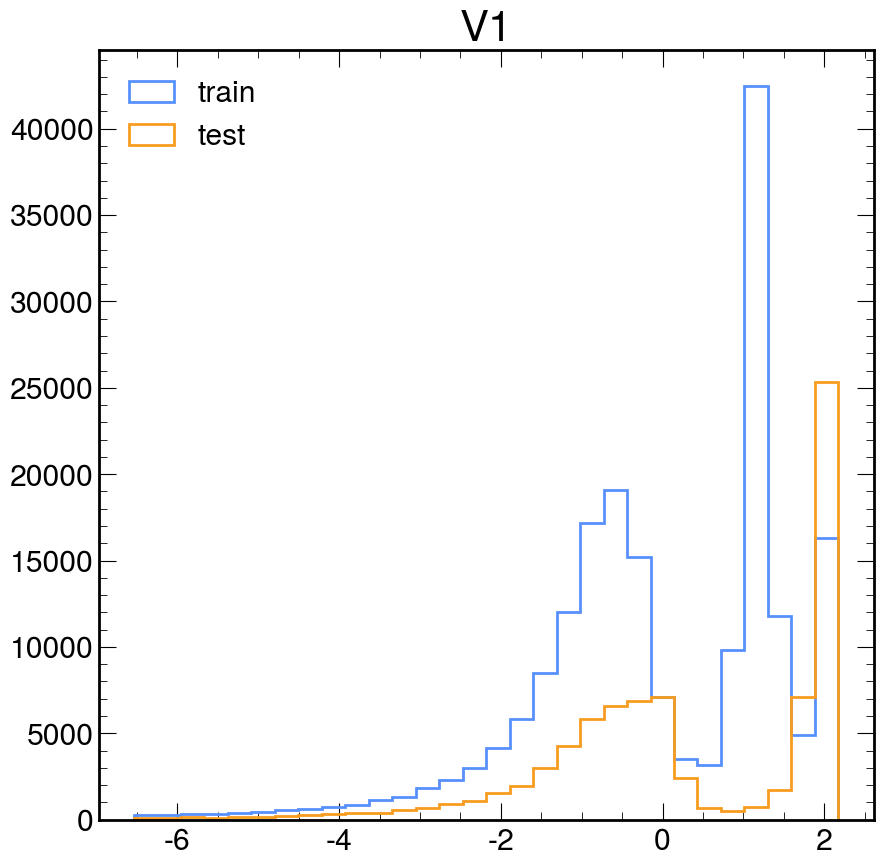

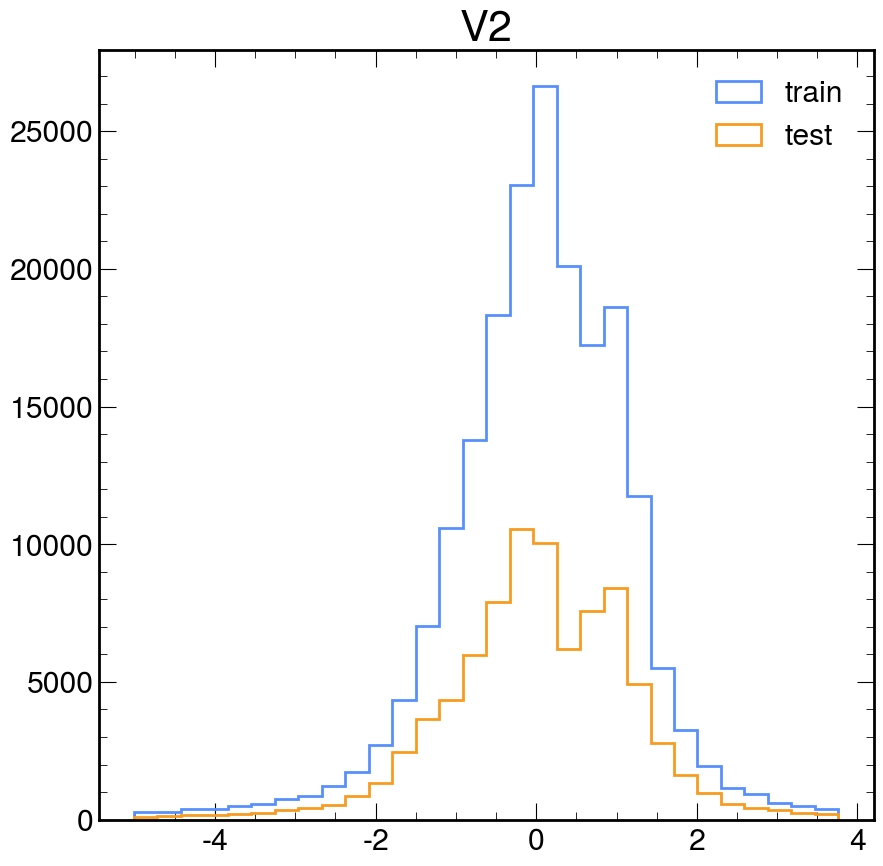

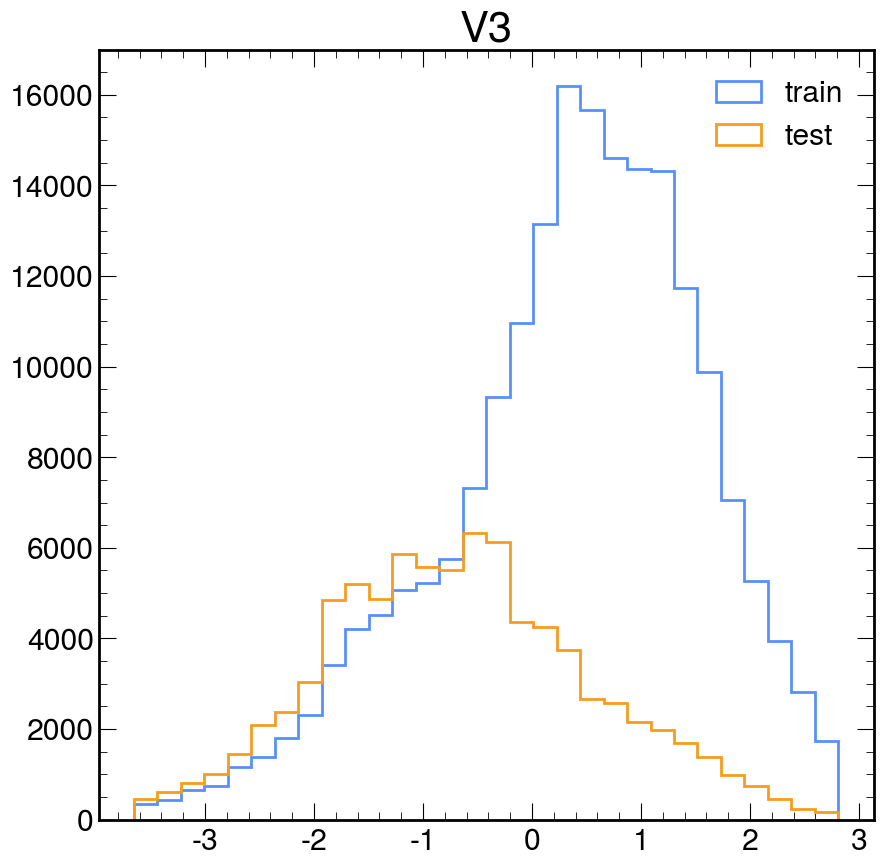

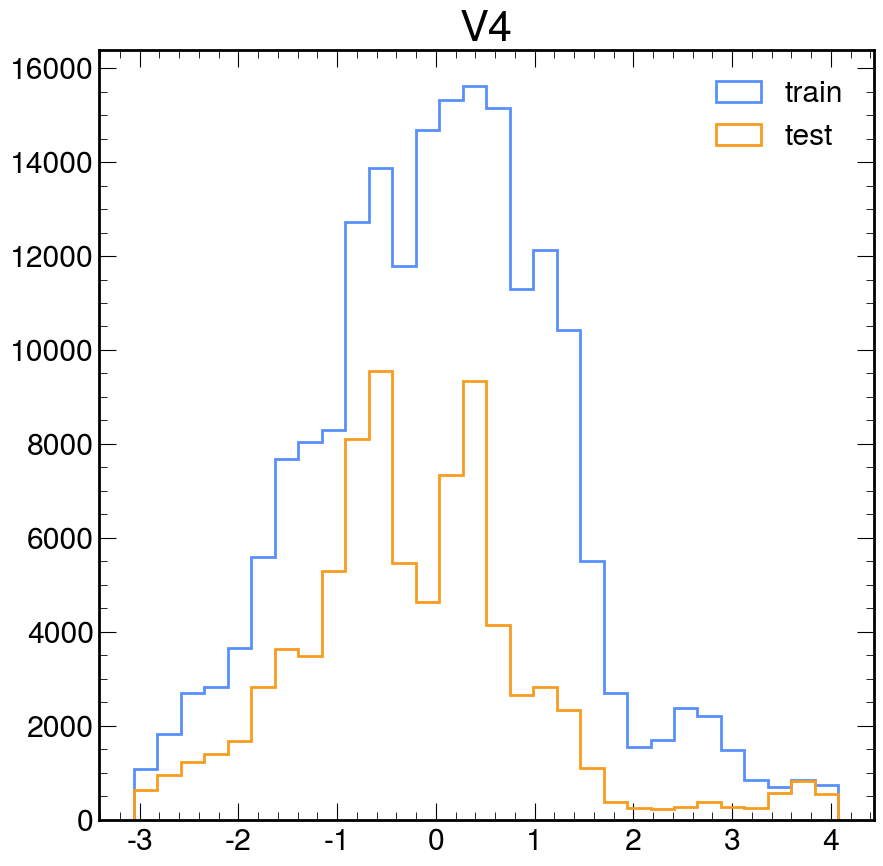

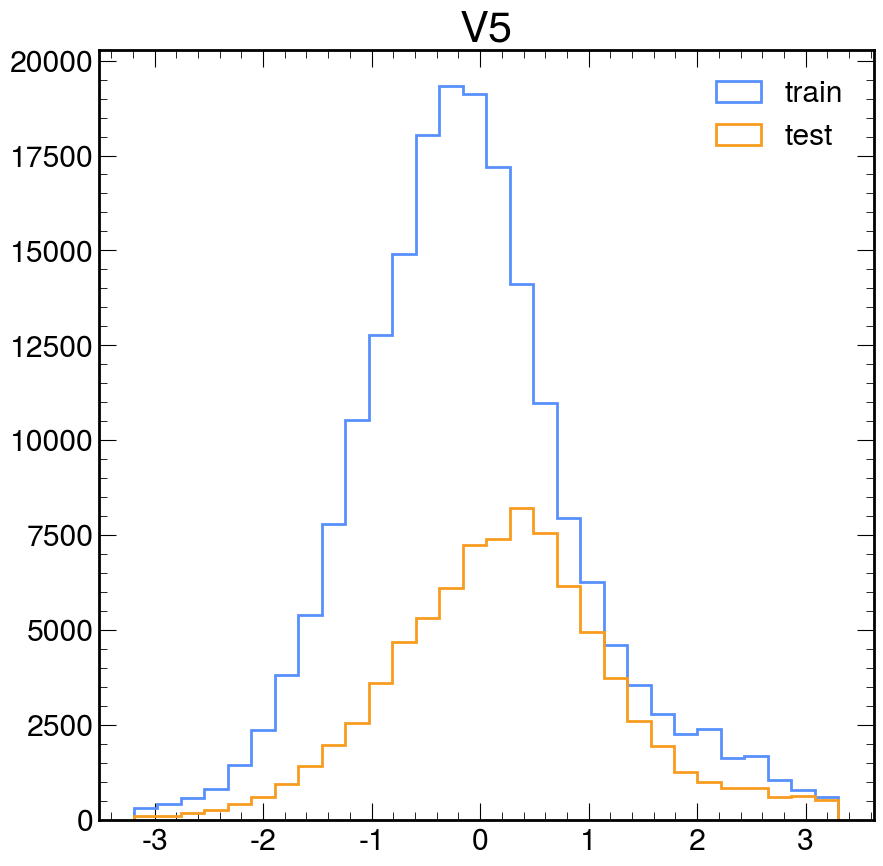

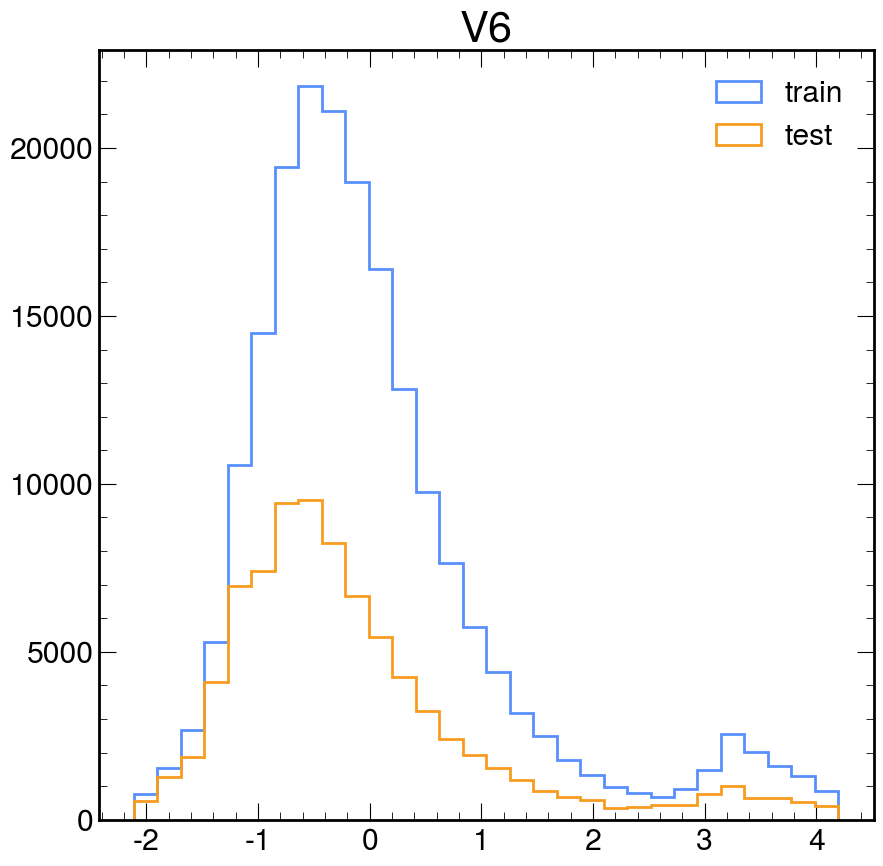

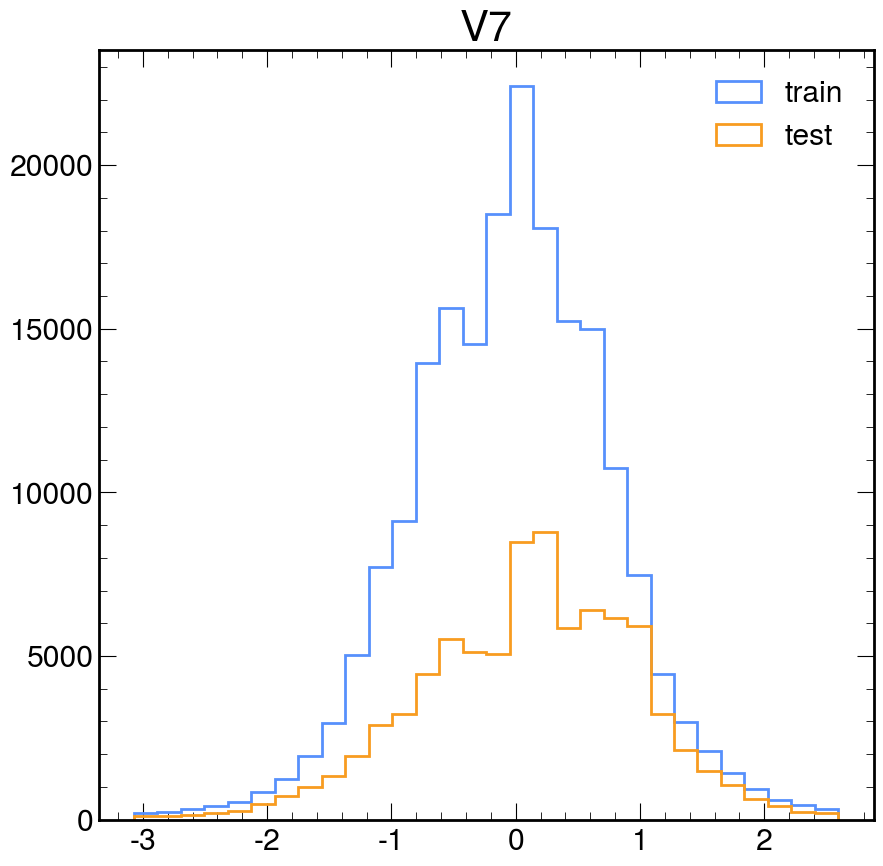

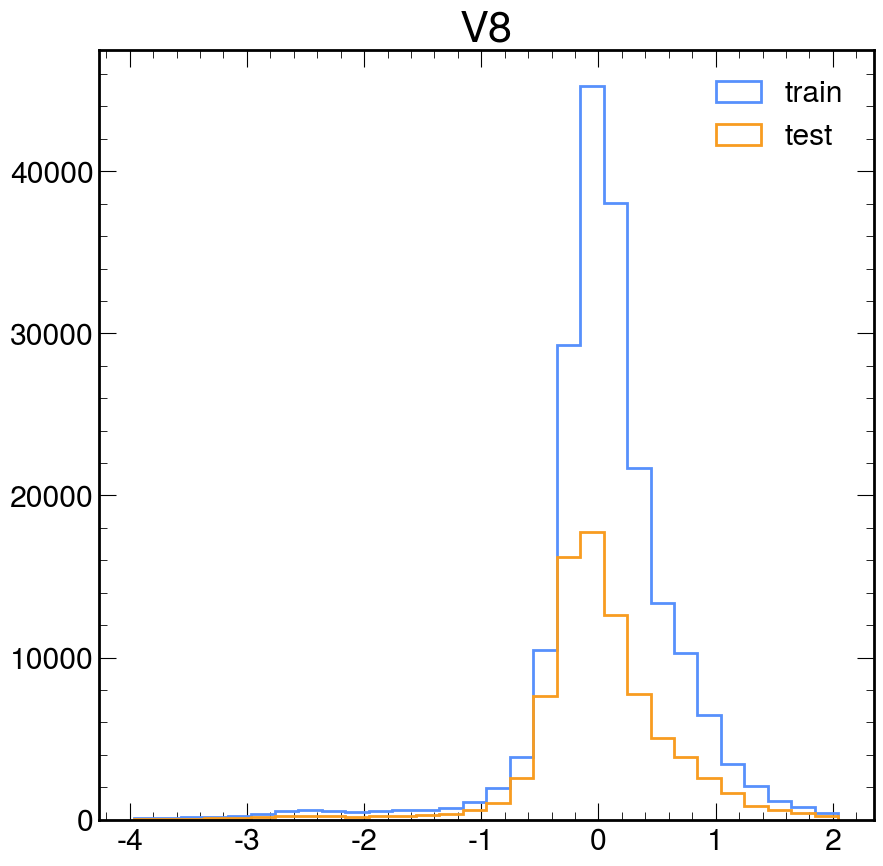

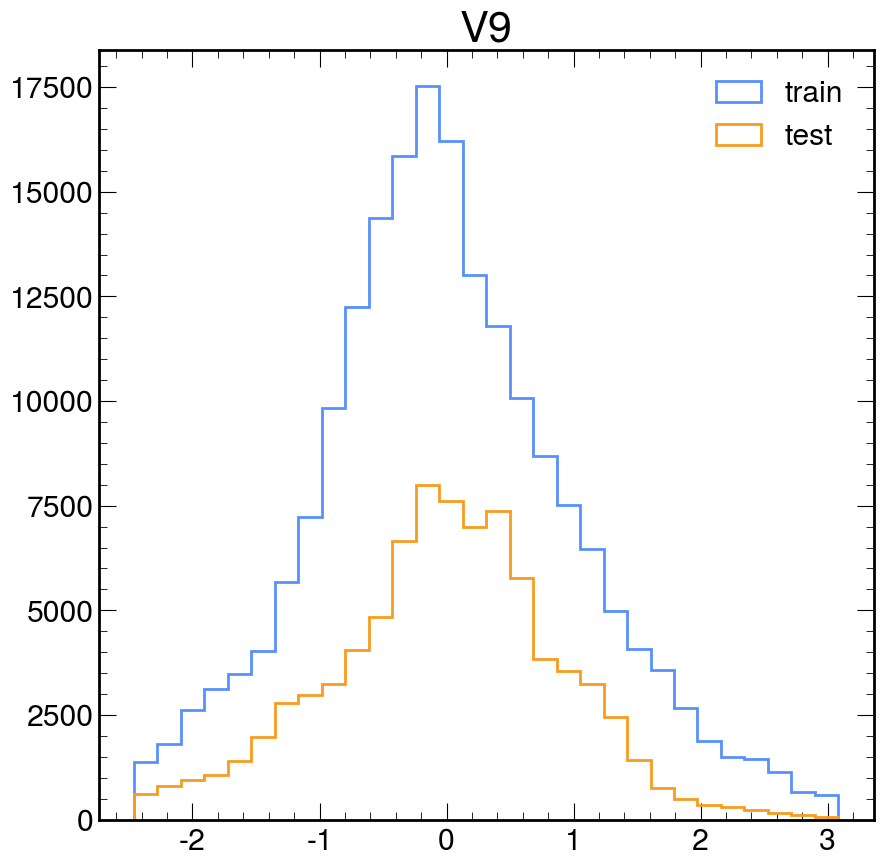

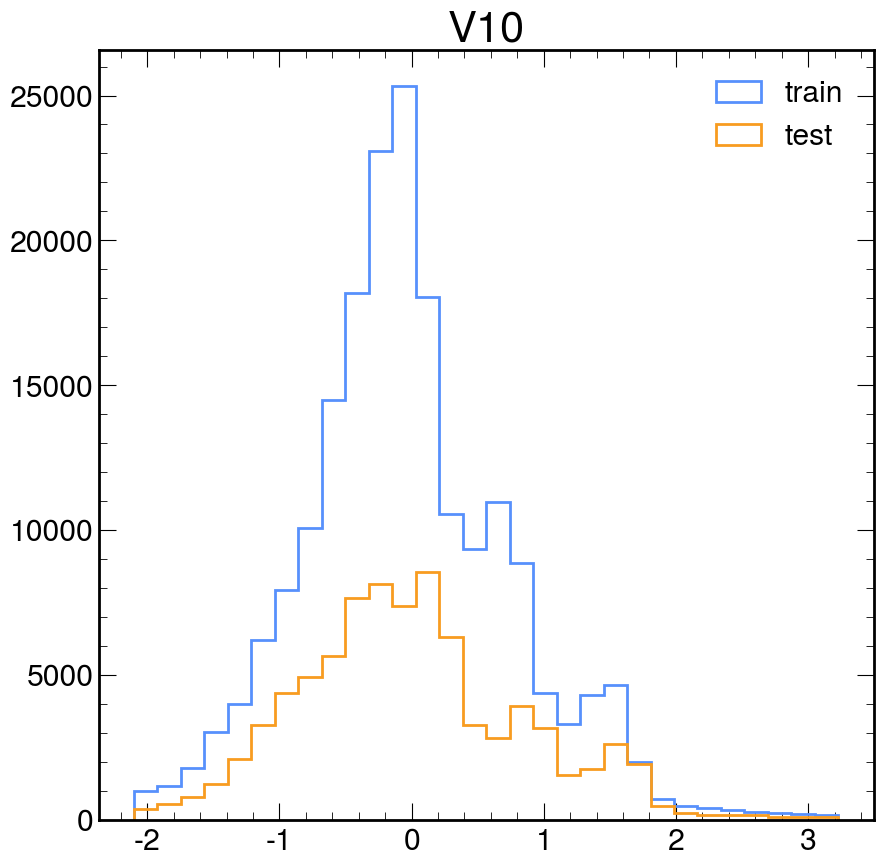

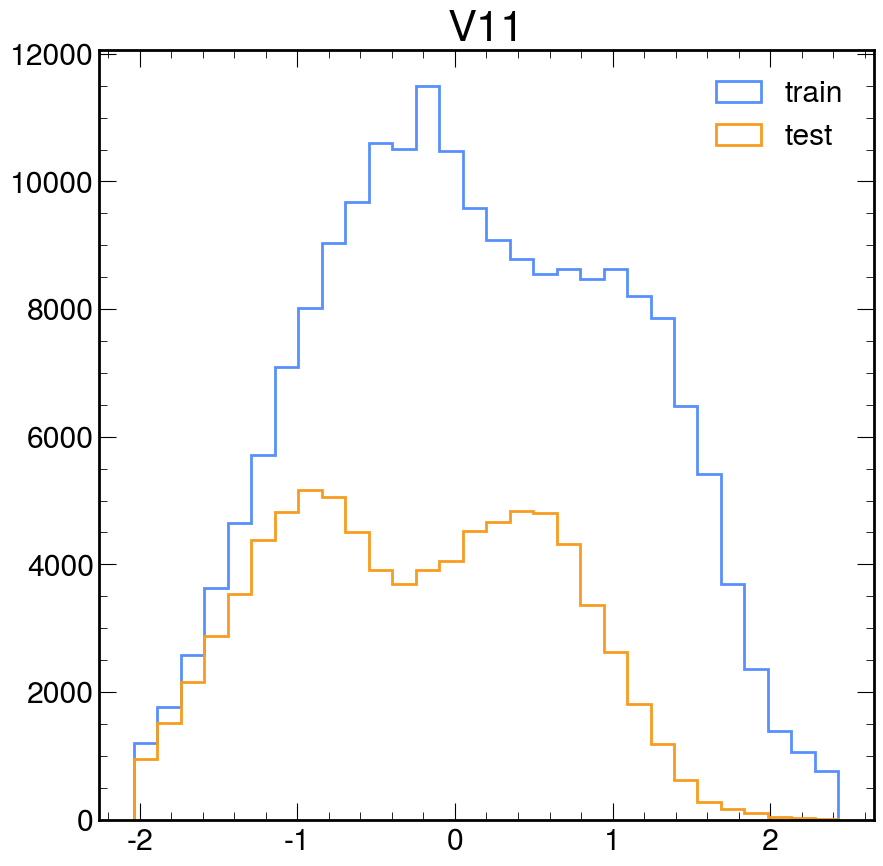

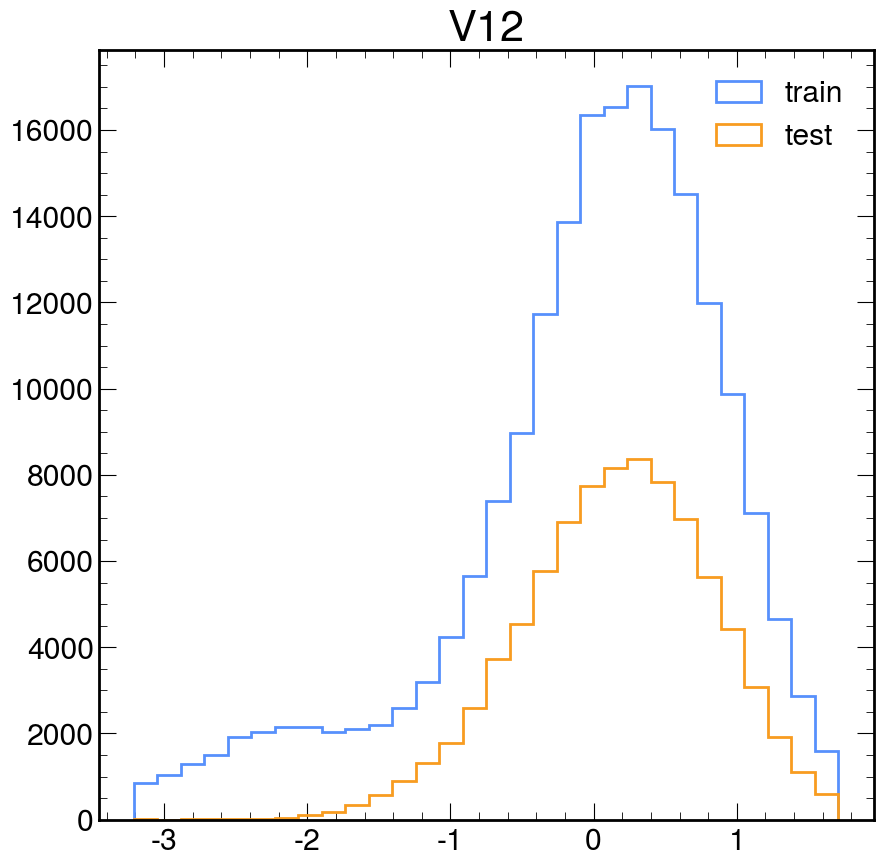

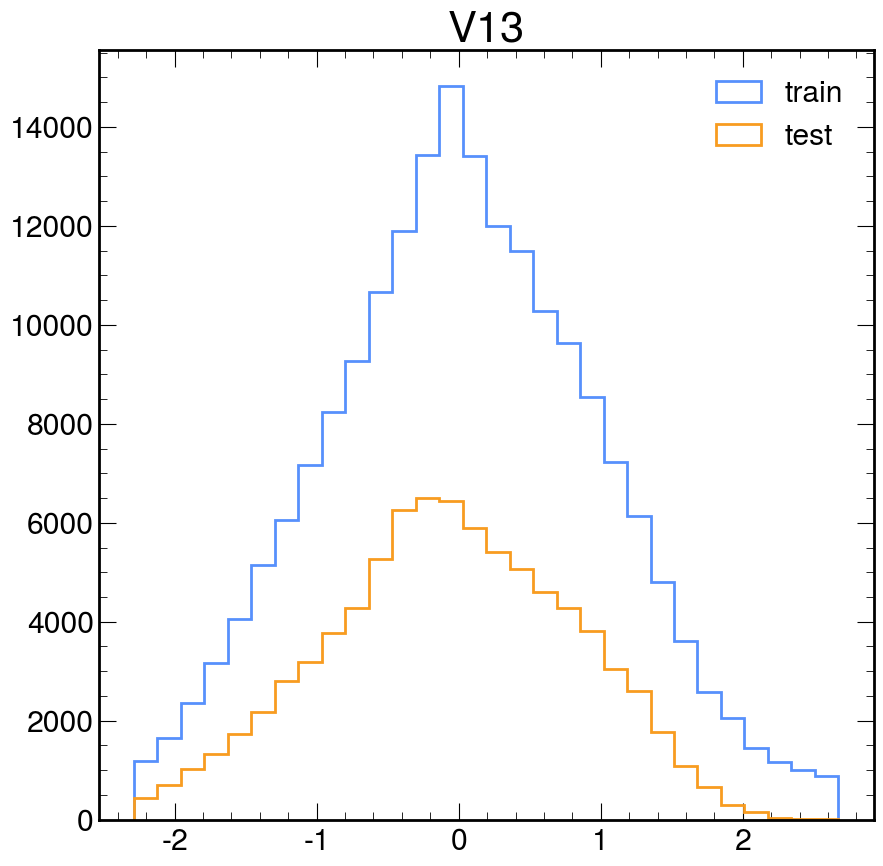

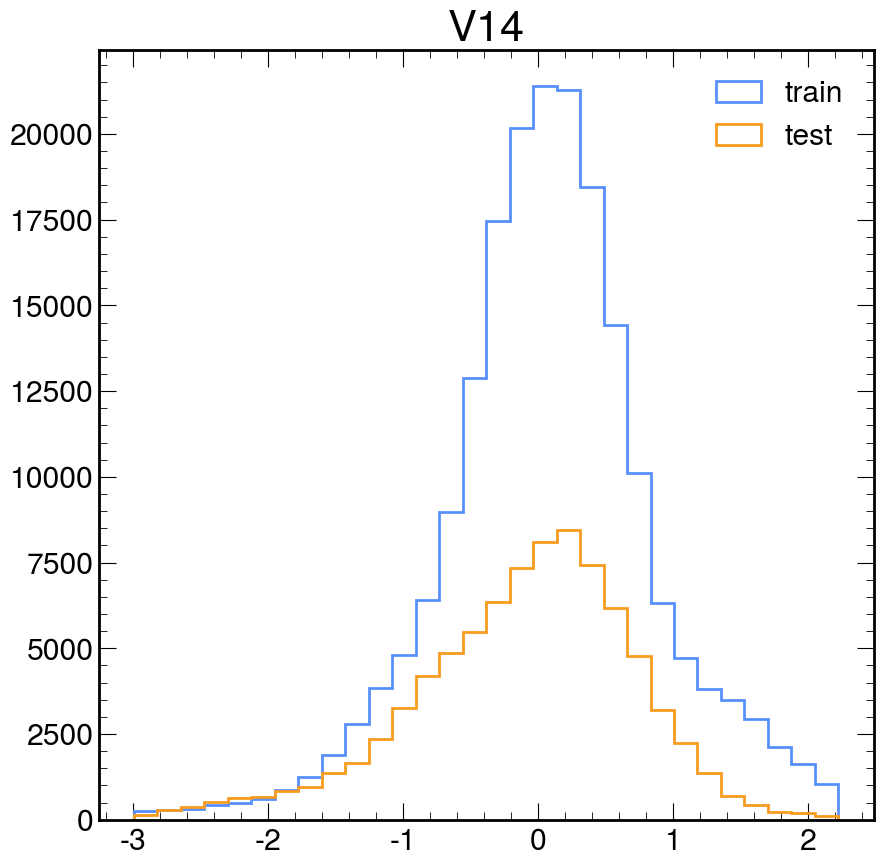

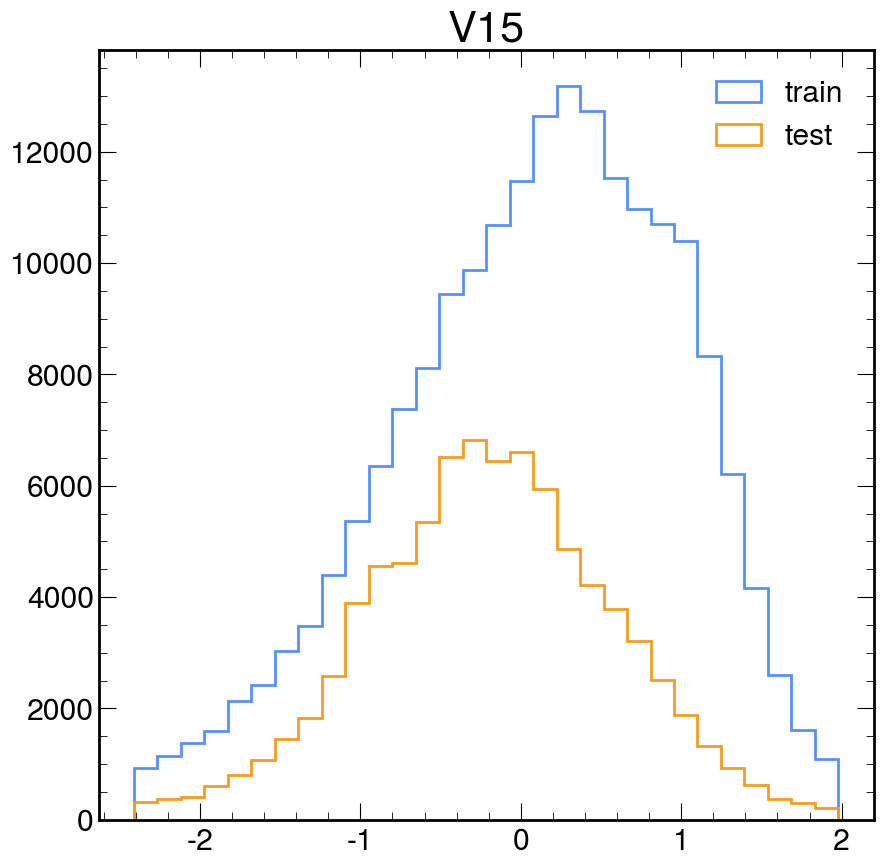

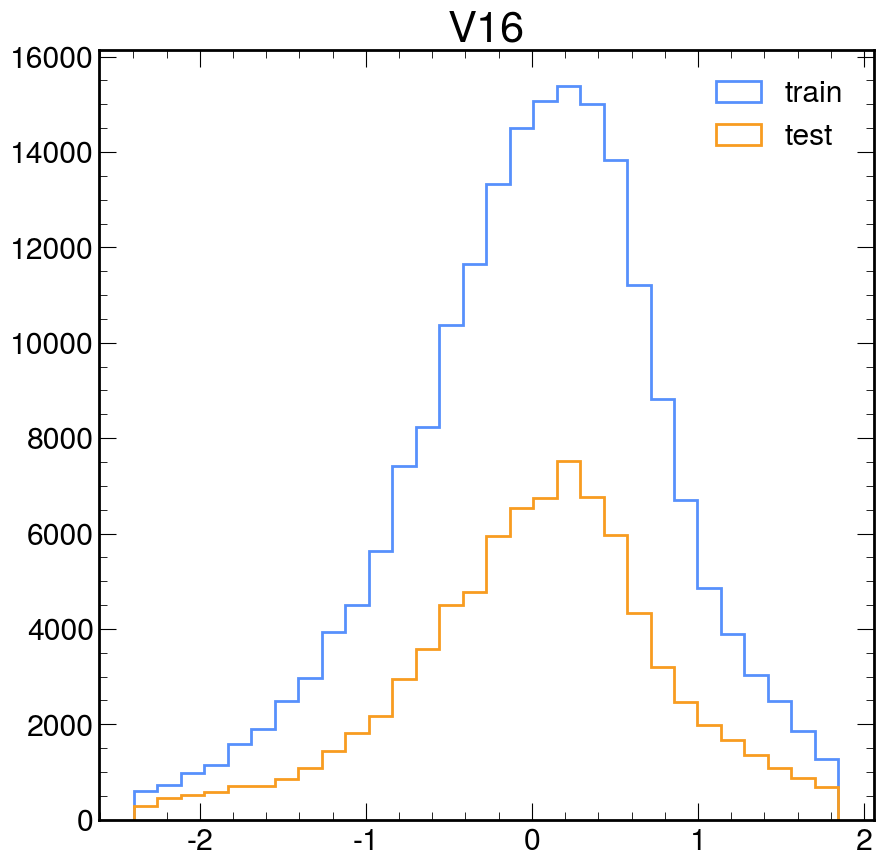

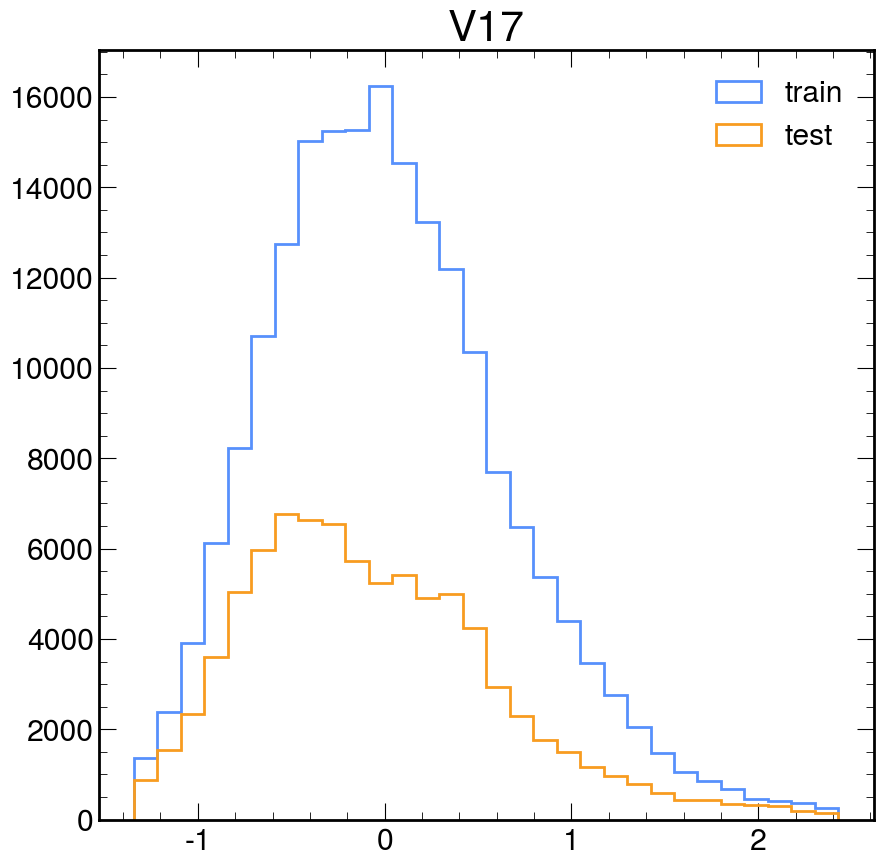

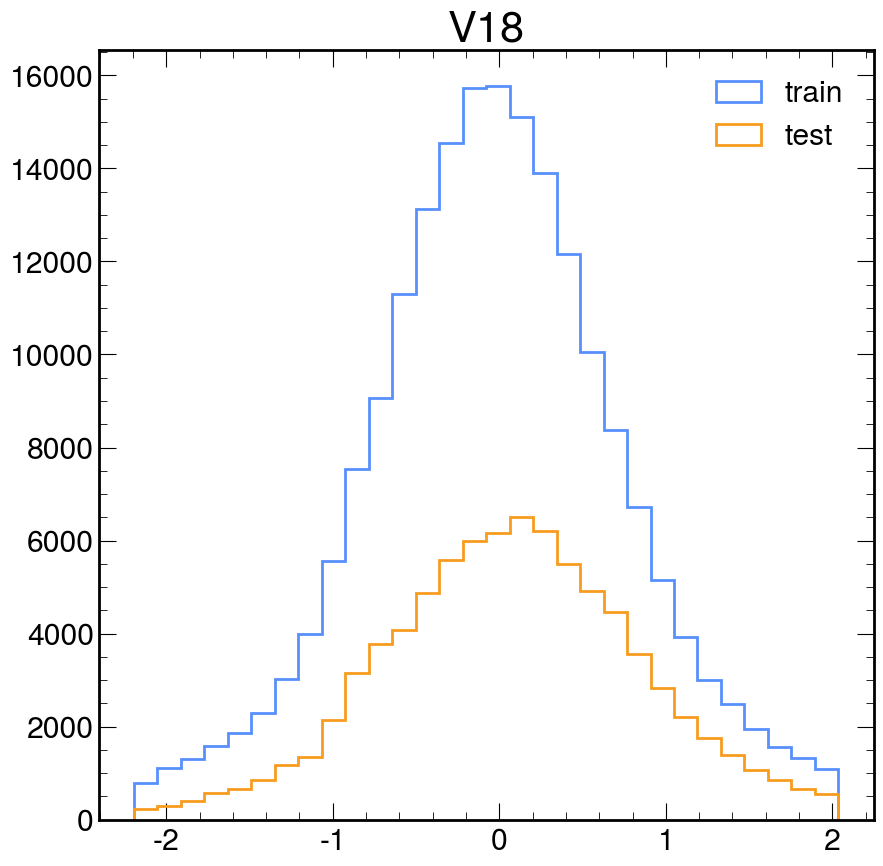

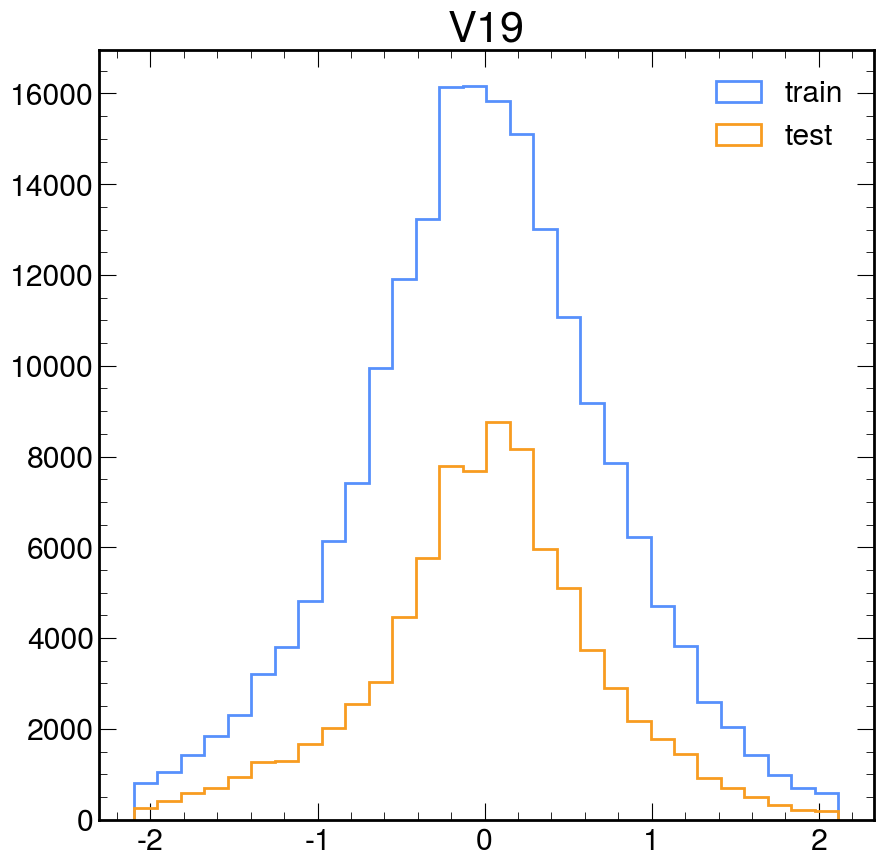

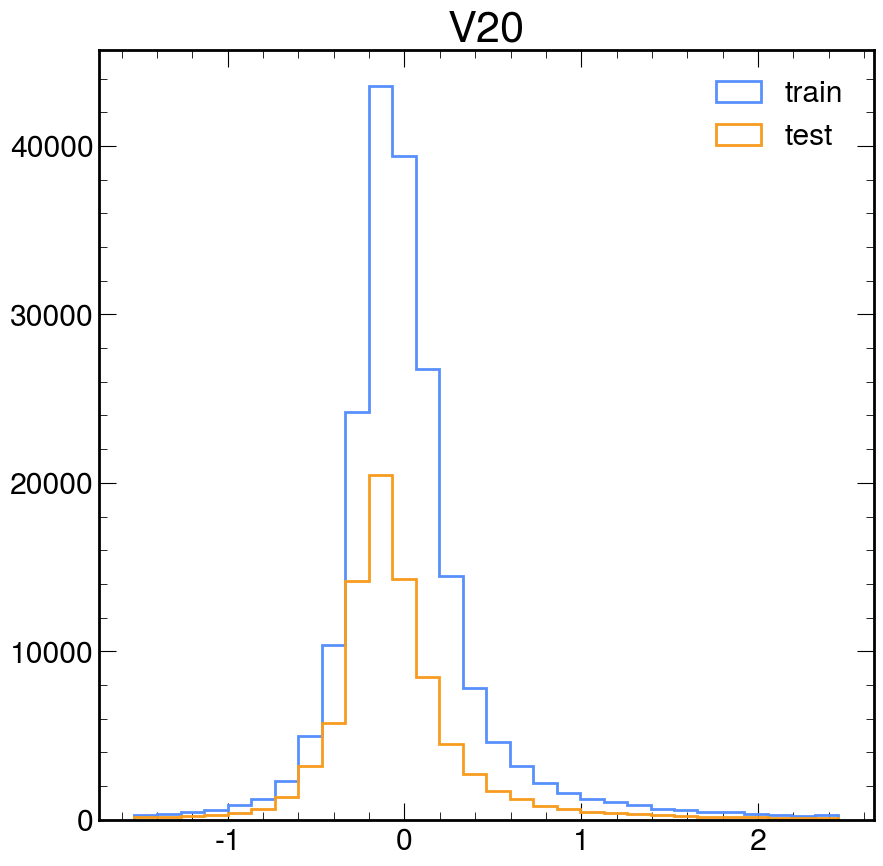

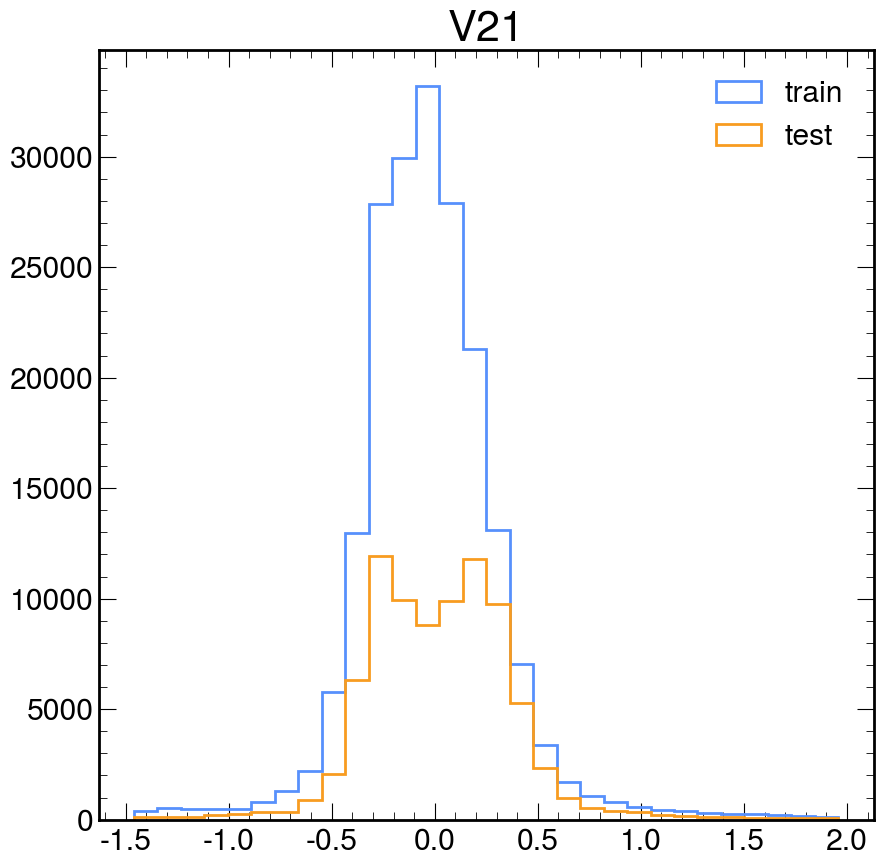

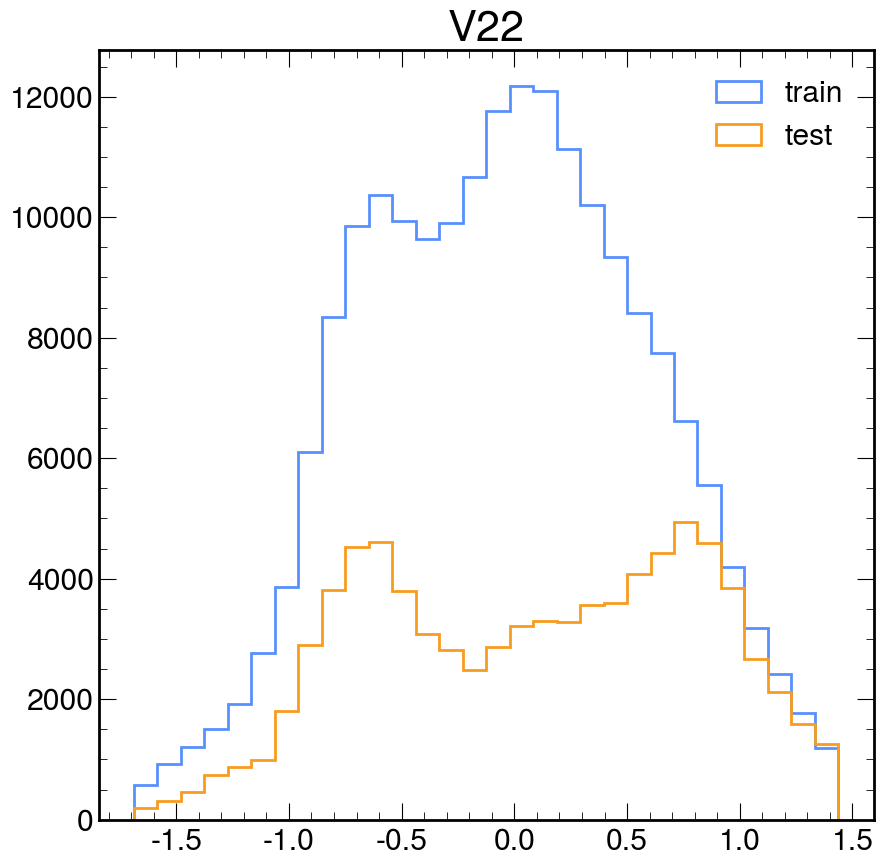

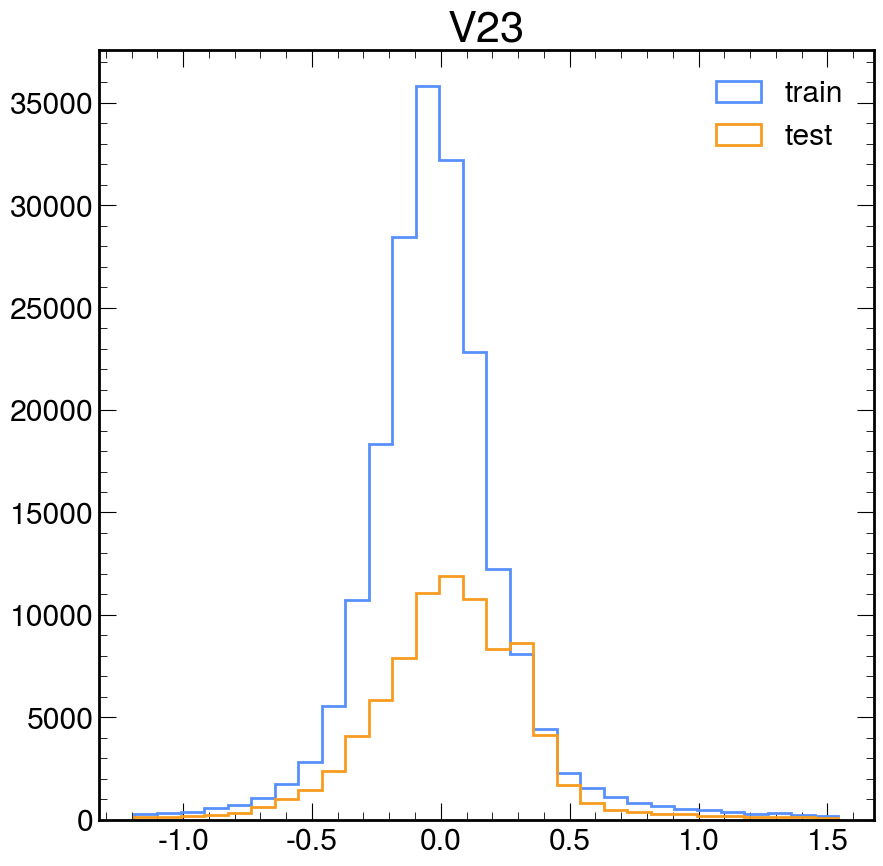

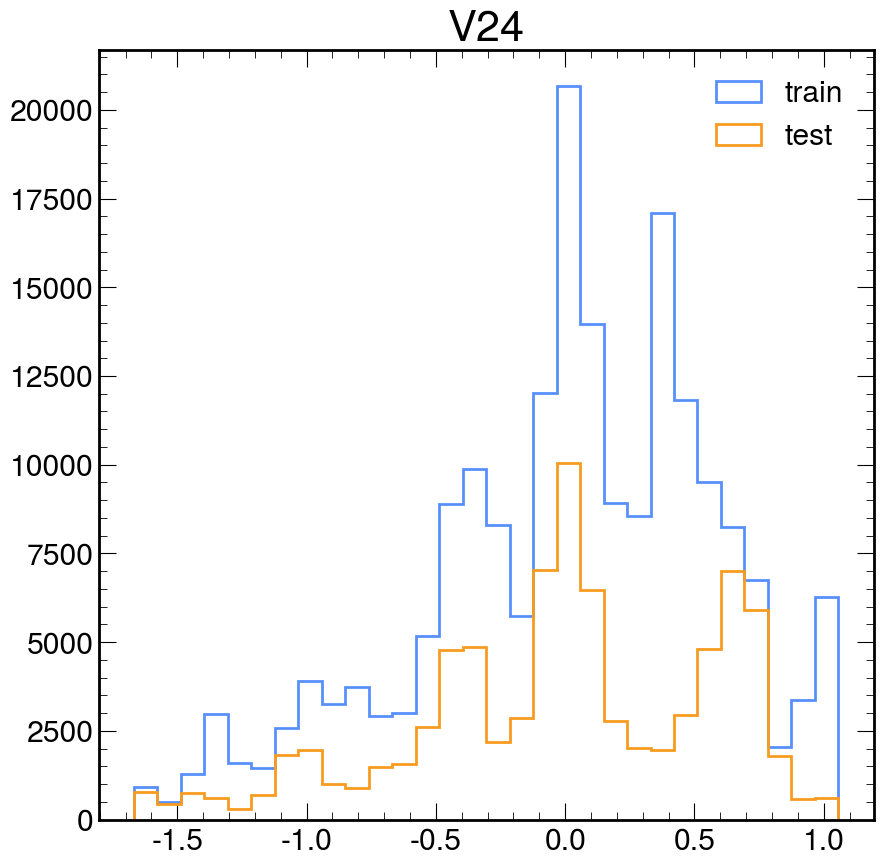

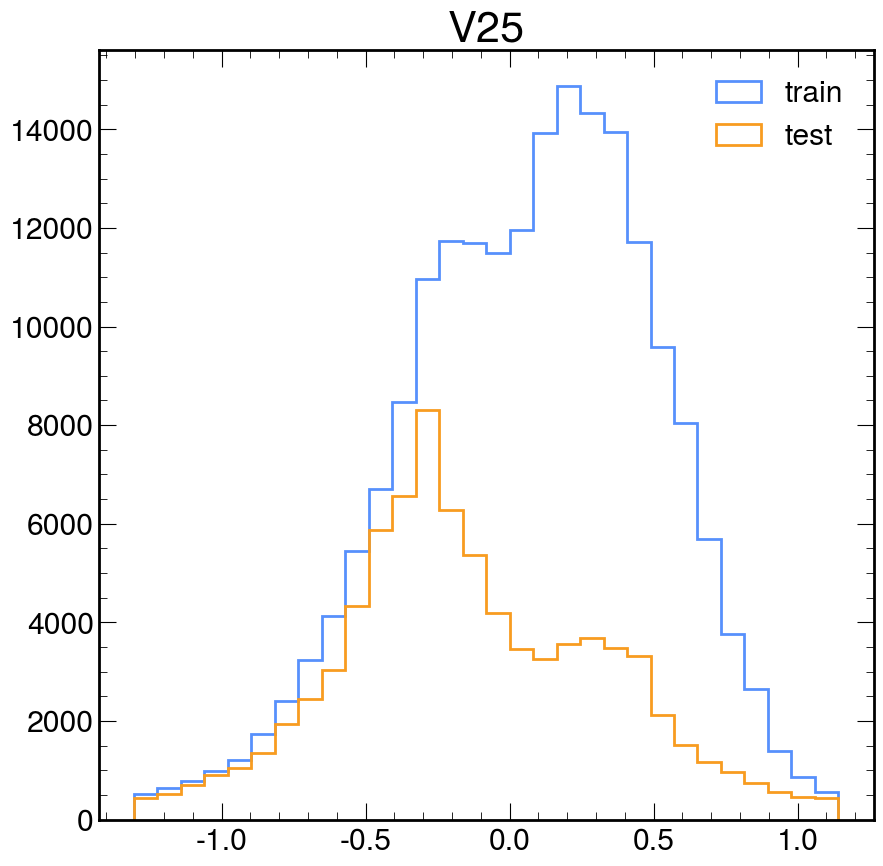

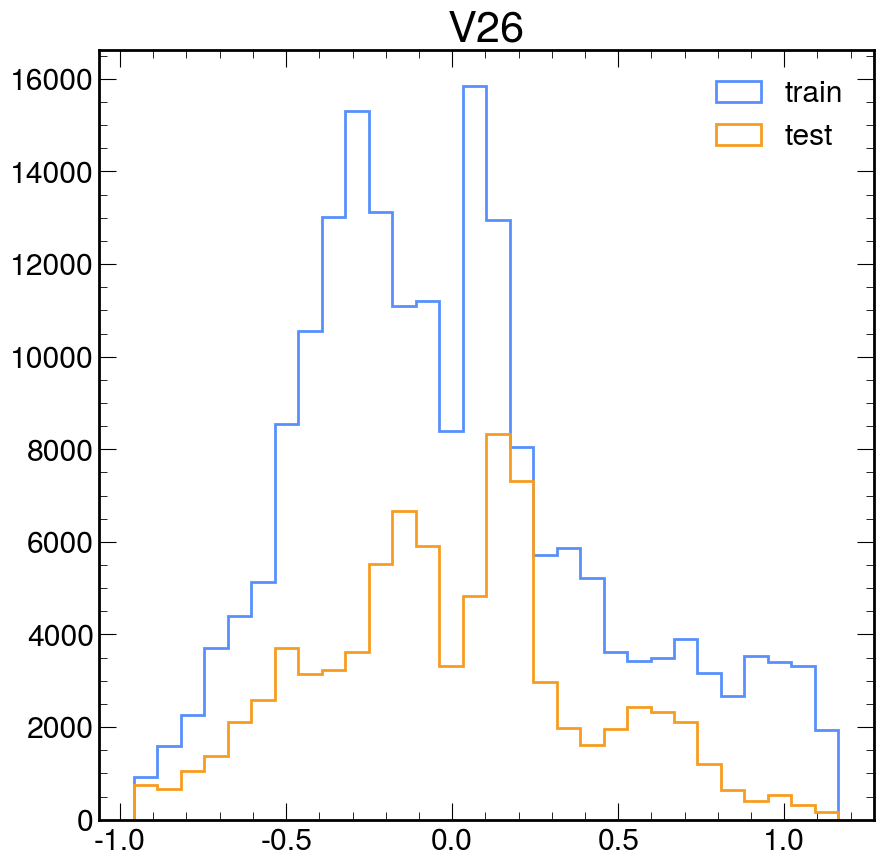

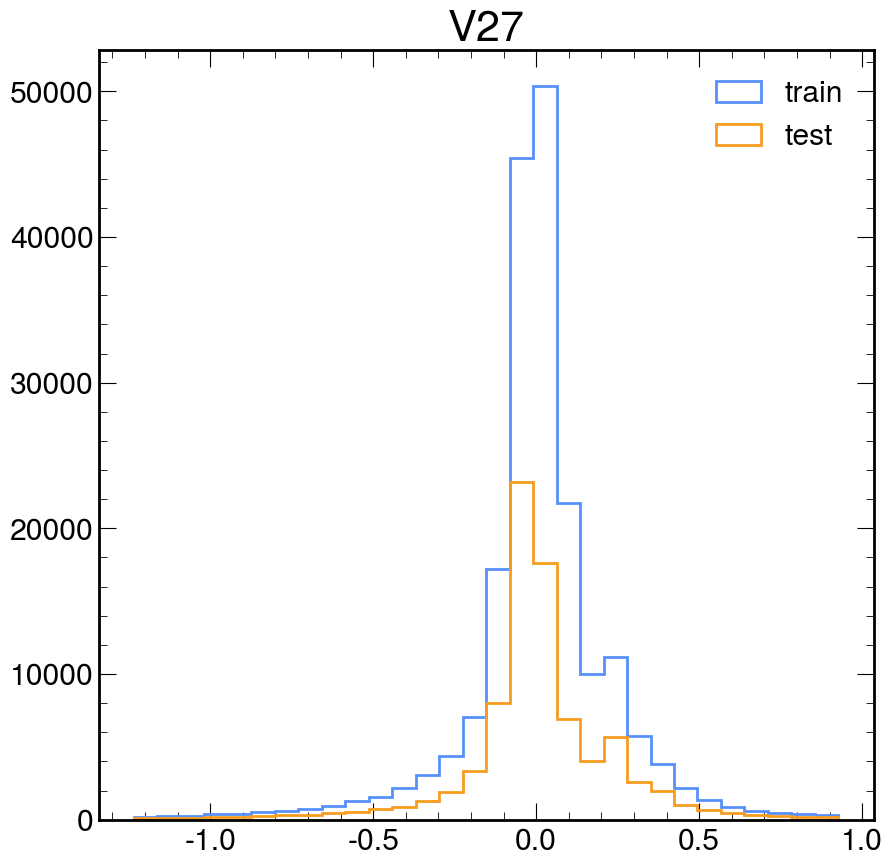

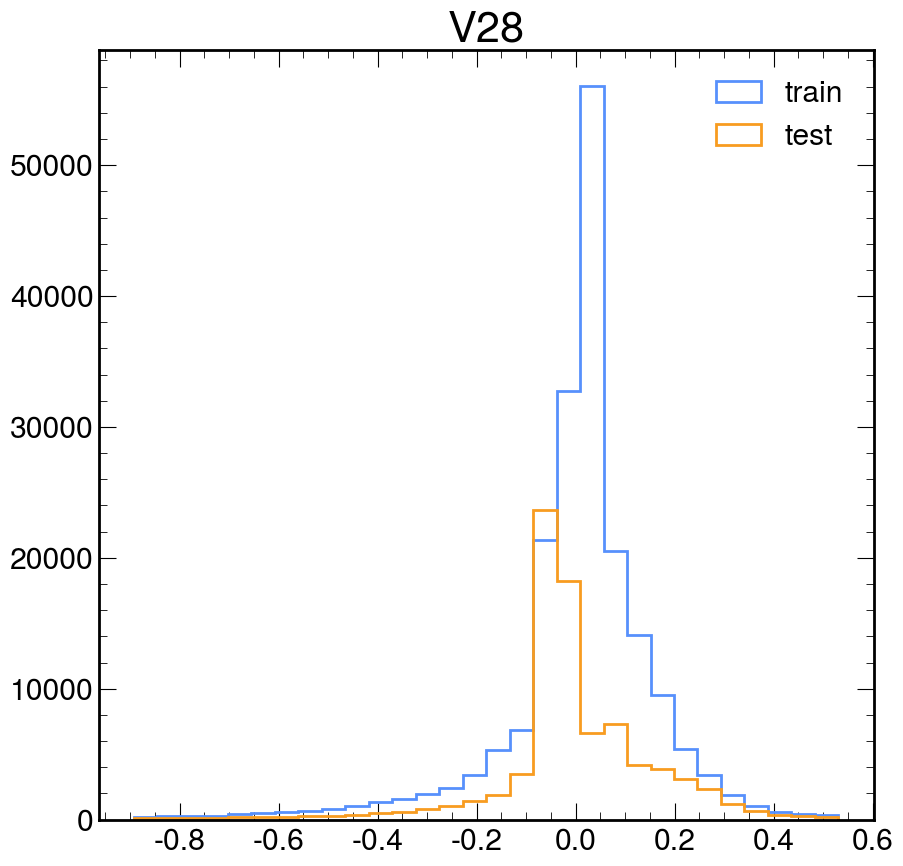

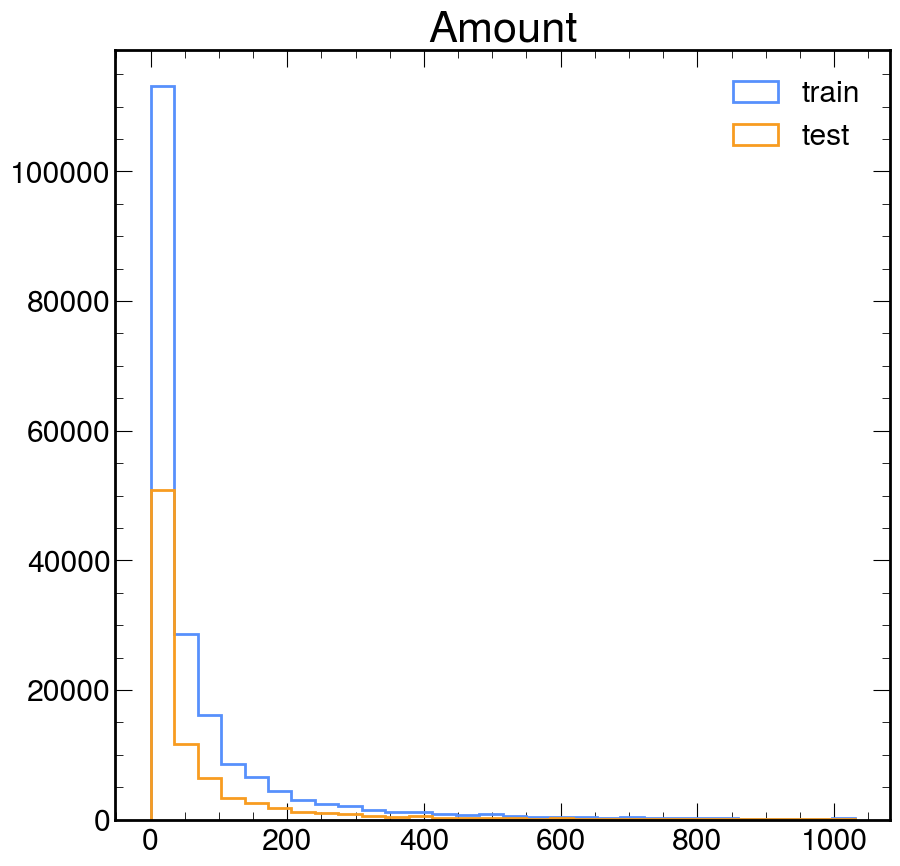

In [71]:
for dim in range(len(features)):
    x_up = np.percentile(X_train[:,dim], 99)
    x_low = np.percentile(X_train[:,dim], 1)
    plt.hist(X_train[:,dim], histtype='step', range=[x_low, x_up], label='train', linewidth=2, bins=30)
    plt.hist(X_test[:,dim], histtype='step', range=[x_low, x_up], label='test', linewidth=2, bins=30)
    # plt.hist(X_train[:,dim], histtype='step', label='train', linewidth=2, bins=30)
    # plt.hist(X_test[:,dim], histtype='step', label='test', linewidth=2, bins=30)
    plt.title(features[dim])
    plt.legend()
    # plt.savefig(f'plots_data/creditcard/feature_distr/{features[dim]}.png', dpi=300, facecolor='white')
    plt.show()

In [72]:
# clip data to [1, 99] percentile of train data (except for first feature)
for dim in range(len(features)):
    x_up = np.percentile(X_train[:,dim], 99)
    x_low = np.percentile(X_train[:,dim], 1)
    X_train[:,dim] = np.clip(X_train[:,dim], x_low, x_up)
    X_test[:,dim] = np.clip(X_test[:,dim], x_low, x_up)

In [73]:
# plot_data(X_train, features, y_train, 'plots_data/creditcard/data_train_clip_unscaled')
# plot_data(X_test, features, y_test, 'plots_data/creditcard/data_test_clip_unscaled')

In [75]:
# only scale 'amount' feature
from sklearn.preprocessing import StandardScaler    

scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test
X_train_scaled[:, -1:] = scaler.fit_transform(X_train[:, -1:])
X_test_scaled[:, -1:] = scaler.transform(X_test[:, -1:])

In [77]:
print(np.mean(X_train_scaled[:, -1]), np.std(X_train_scaled[:, -1]), np.mean(X_test_scaled[:, -1]), np.std(X_test_scaled[:, -1]))

-2.4235521975726214e-18 0.9999999999999999 -0.026290416773159454 0.9787965495134776


In [57]:
# from sklearn.preprocessing import StandardScaler    

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [76]:
plot_data(X_train_scaled, features, y_train, 'plots_data/creditcard/data_train_clip_scaled2')
plot_data(X_test_scaled, features, y_test, 'plots_data/creditcard/data_test_clip_scaled2')

In [78]:
# save with time encoding
X_train_scaled = np.concatenate((time_train, X_train_scaled), axis=1)
print(X_train_scaled.shape)
X_test_scaled = np.concatenate((time_test, X_test_scaled), axis=1)
print(X_test_scaled.shape)


(199364, 33)
(85443, 33)


In [79]:
# np.save('processed/creditcard_time/train.npy', X_train_scaled)
# np.save('processed/creditcard_time/test.npy', X_test_scaled)
# np.save('processed/creditcard_time/labels.npy', y_test)

In [ ]:
# np.save('processed/creditcard/train.npy', X_train_scaled)
# np.save('processed/creditcard/test.npy', X_test_scaled)
# np.save('processed/creditcard/labels.npy', y_test)